<a href="https://colab.research.google.com/github/woodskd24/CS675-Data-Science/blob/main/Bronx_FINAL_675KDW_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##CS 675: Project 3 (Kelsey Woods)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* Implement a Time Series Forecasting model in Python, by using the FBProphet module.
* The forecasting model should be able to predict New York City’s Electricity
Consumption (see below) by using Facebook’s Prophet model.
* Prophet is a procedure/model for forecasting time series data based on an additive model where nonlinear trends are fit with yearly, weekly, and daily seasonality.
* You should test your forecasting model in three (3) distinct datasets. On Daily, Monthly, and Yearly Mean electric consumption.

##Preparation

In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from pandas import to_datetime
import matplotlib.pyplot as plt
import plotly.offline as py
import seaborn as sns
from prophet.plot import add_changepoints_to_plot
from prophet.diagnostics import cross_validation, performance_metrics
py.init_notebook_mode()
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Electric_Consumption_And_Cost__2010_-_Feb_2022_.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
df.head()

Development Name Borough Account Name Location Meter AMR   Meter Scope  \
0            ADAMS   BRONX        ADAMS   BLD 05      NONE  BLD 01 to 07   
1            ADAMS   BRONX        ADAMS   BLD 05      NONE  BLD 01 to 07   
2            ADAMS   BRONX        ADAMS   BLD 05      NONE  BLD 01 to 07   
3            ADAMS   BRONX        ADAMS   BLD 05      NONE  BLD 01 to 07   
4            ADAMS   BRONX        ADAMS   BLD 05      NONE  BLD 01 to 07   

   TDS #  EDP  RC Code Funding Source  ... Meter Number Estimated  \
0  118.0  248  B011800        FEDERAL  ...      7223256         N   
1  118.0  248  B011800        FEDERAL  ...      7223256         N   
2  118.0  248  B011800        FEDERAL  ...      7223256         N   
3  118.0  248  B011800        FEDERAL  ...      7223256         N   
4  118.0  248  B011800        FEDERAL  ...      7223256         N   

   Current Charges   Rate Class Bill Analyzed Consumption (KWH)  KWH Charges  \
0         15396.82  GOV/NYC/068           Yes            128800      7387.97   
1         14556.34  GOV/NYC/068           Yes            115200      6607.87   
2         13904.98  GOV/NYC/068           Yes            103200      5919.55   
3         14764.04  GOV/NYC/068           Yes            105600      6057.22   
4         13729.54  GOV/NYC/068           Yes             97600      5598.34   

  Consumption (KW) KW Charges  Other charges  
0            216.0     2808.0        5200.85  
1            224.0     2912.0        5036.47  
2            216.0     2808.0        5177.43  
3            208.0     2704.0        6002.82  
4            216.0     2808.0        5323.20  

[5 rows x 27 columns]

##Borough

In [ ]:
df = df[df['Borough'] == "BRONX"]

##Column Redo

In [ ]:
df['Service End Date'] = pd.to_datetime(df['Service End Date'])

In [ ]:
df['year'] = df['Service End Date'].dt.year
df['month'] = df['Service End Date'].dt.month
df['day'] = df['Service End Date'].dt.day

In [ ]:
data_to_use = df.filter(['Service End Date','Consumption (KW)'])

In [ ]:
data_to_use.columns = ['ds','y']

In [ ]:
data_to_use['ds'] = pd.to_datetime(data_to_use['ds'])

In [ ]:
df['ds'].max()

Timestamp('2022-01-25 00:00:00')

In [ ]:
df.to_csv('/content/drive/MyDrive/ProphetEnergy.csv')

In [ ]:
m = Prophet(yearly_seasonality=20)
m.add_country_holidays(country_name='US')
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqgf1dy0i/8n5bf8ki.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqgf1dy0i/zskm3bbe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23296', 'data', 'file=/tmp/tmpqgf1dy0i/8n5bf8ki.json', 'init=/tmp/tmpqgf1dy0i/zskm3bbe.json', 'output', 'file=/tmp/tmpqgf1dy0i/prophet_model2jwg9a3t/prophet_model-20221215001026.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:10:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:10:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##100 Days

In [ ]:
future_dates_day = m.make_future_dataframe(periods=1*100)

In [ ]:
prediction = m.predict(future_dates_day)

In [ ]:
prediction.tail(20)

ds       trend   yhat_lower   yhat_upper  trend_lower  \
223 2022-04-16  278.955664 -1036.893423  1052.294451   278.645150   
224 2022-04-17  279.065142  -901.616914  1306.247482   278.741171   
225 2022-04-18  279.174619 -1110.757073  1075.946572   278.839049   
226 2022-04-19  279.284097 -1093.564260  1065.736850   278.940468   
227 2022-04-20  279.393575 -1080.270622  1097.095408   279.040629   
228 2022-04-21  279.503052 -1000.144741  1113.544990   279.141242   
229 2022-04-22  279.612530  -994.294893  1282.299213   279.244163   
230 2022-04-23  279.722007  -826.336344  1284.793786   279.346288   
231 2022-04-24  279.831485  -498.293256  1516.575502   279.447540   
232 2022-04-25  279.940962  -956.158517  1267.017315   279.548793   
233 2022-04-26  280.050440  -930.016191  1144.973244   279.650045   
234 2022-04-27  280.159918 -1068.287055  1123.020515   279.737922   
235 2022-04-28  280.269395 -1028.361030  1024.322017   279.819906   
236 2022-04-29  280.378873 -1100.964808  1000.577269   279.922512   
237 2022-04-30  280.488350 -1002.533391  1075.169991   280.024536   
238 2022-05-01  280.597828  -762.569068  1258.896374   280.126017   
239 2022-05-02  280.707306 -1120.234847   957.133386   280.227663   
240 2022-05-03  280.816783 -1145.653006  1031.395701   280.321139   
241 2022-05-04  280.926261 -1113.069309  1057.628513   280.391530   
242 2022-05-05  281.035738 -1059.208730  1125.120945   280.487973   

     trend_upper  Christmas Day  Christmas Day_lower  Christmas Day_upper  \
223   279.489005            0.0                  0.0                  0.0   
224   279.606132            0.0                  0.0                  0.0   
225   279.723242            0.0                  0.0                  0.0   
226   279.853957            0.0                  0.0                  0.0   
227   280.003574            0.0                  0.0                  0.0   
228   280.121904            0.0                  0.0                  0.0   
229   280.259857            0.0                  0.0                  0.0   
230   280.382120            0.0                  0.0                  0.0   
231   280.501799            0.0                  0.0                  0.0   
232   280.620875            0.0                  0.0                  0.0   
233   280.739952            0.0                  0.0                  0.0   
234   280.872050            0.0                  0.0                  0.0   
235   281.000066            0.0                  0.0                  0.0   
236   281.146363            0.0                  0.0                  0.0   
237   281.270395            0.0                  0.0                  0.0   
238   281.393593            0.0                  0.0                  0.0   
239   281.515426            0.0                  0.0                  0.0   
240   281.637033            0.0                  0.0                  0.0   
241   281.764278            0.0                  0.0                  0.0   
242   281.887712            0.0                  0.0                  0.0   

     Christmas Day (Observed)  ...      weekly  weekly_lower  weekly_upper  \
223                       0.0  ...   44.905703     44.905703     44.905703   
224                       0.0  ...  254.696845    254.696845    254.696845   
225                       0.0  ...  -43.181720    -43.181720    -43.181720   
226                       0.0  ...  -39.068521    -39.068521    -39.068521   
227                       0.0  ...  -59.580747    -59.580747    -59.580747   
228                       0.0  ...  -72.954819    -72.954819    -72.954819   
229                       0.0  ...  -84.816741    -84.816741    -84.816741   
230                       0.0  ...   44.905703     44.905703     44.905703   
231                       0.0  ...  254.696845    254.696845    254.696845   
232                       0.0  ...  -43.181720    -43.181720    -43.181720   
233                       0.0  ...  -39.068521    -39.068521    -39.068521   
234     

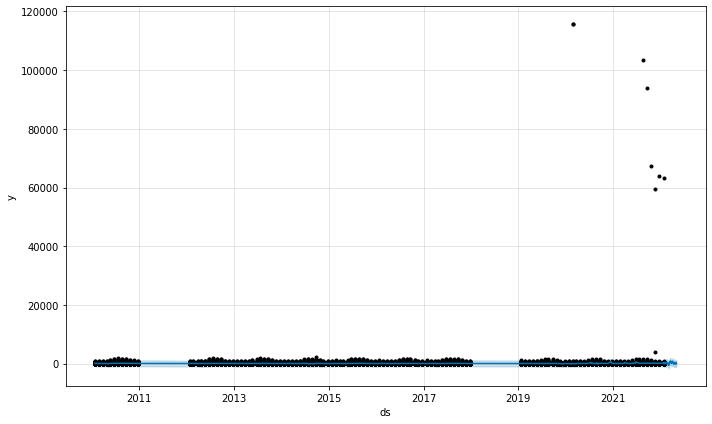

In [ ]:
import matplotlib.pyplot as plt
m.plot(prediction)
plt.show()

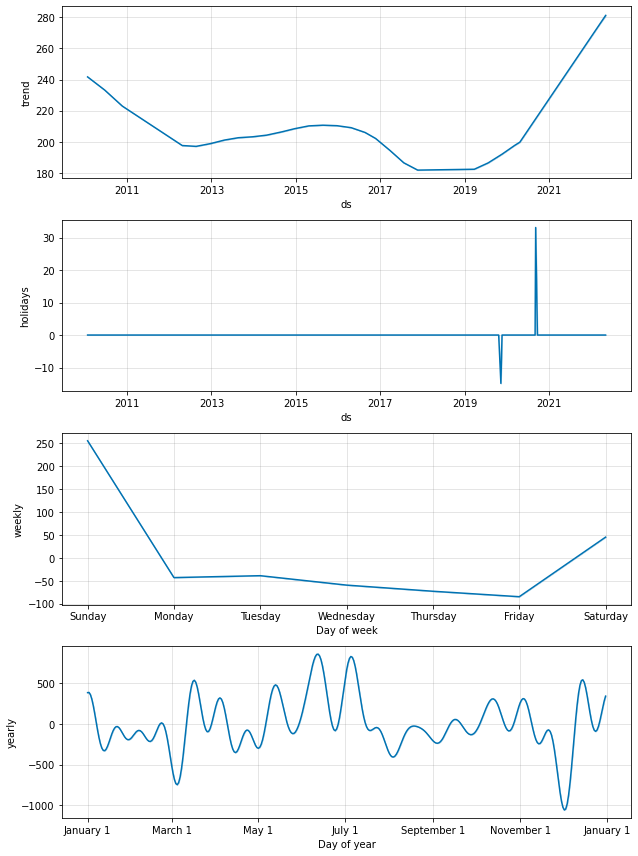

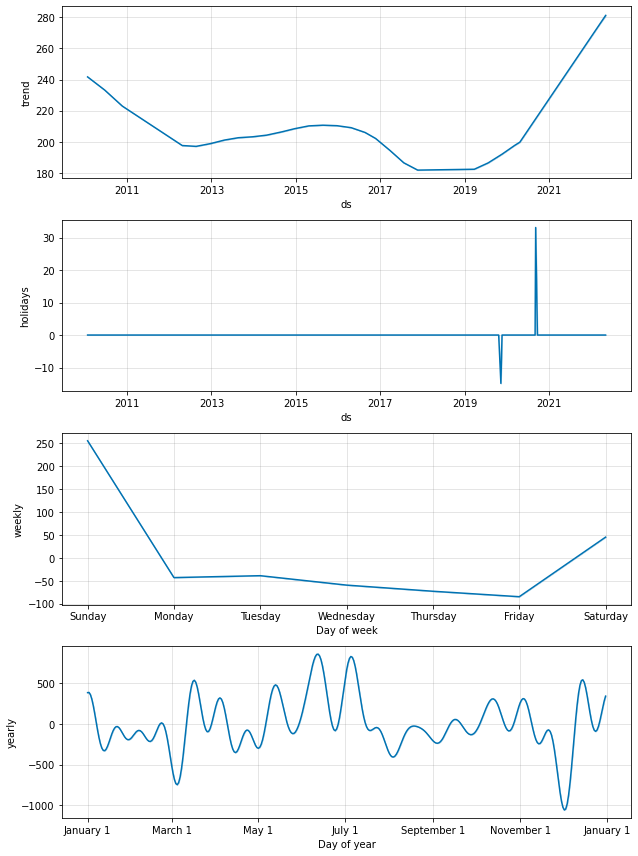

In [ ]:
m.plot_components(prediction)

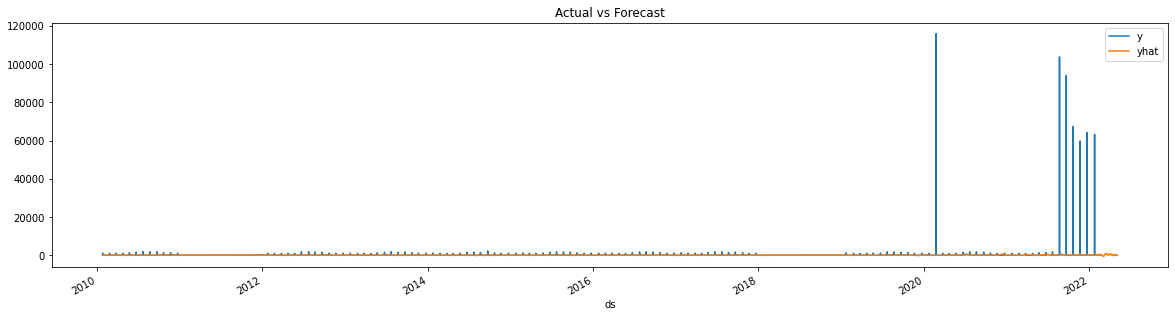

In [ ]:
ax = (df.plot(x='ds',y='y',figsize=(20,5),title='Actual Vs Forecast'))
prediction.plot(x='ds',y='yhat',figsize=(20,5),title='Actual vs Forecast', ax=ax)

In [ ]:
forecast = m.predict(future_dates_day)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat   yhat_lower   yhat_upper
238 2022-05-01  237.274069  -833.370691  1278.383962
239 2022-05-02  -53.276624 -1063.657830   944.128588
240 2022-05-03  -18.824199 -1074.072722  1040.583206
241 2022-05-04   13.933901 -1054.817905  1152.684128
242 2022-05-05   74.371839  -997.626193  1170.240677

##200 Days

In [ ]:
future_dates_day = m.make_future_dataframe(periods=1*200)

In [ ]:
prediction = m.predict(future_dates_day)

In [ ]:
prediction.tail(20)

ds       trend   yhat_lower   yhat_upper  trend_lower  \
323 2022-07-25  289.903423  -888.476441  1234.379963   287.872536   
324 2022-07-26  290.012900  -869.502897  1193.132214   287.968760   
325 2022-07-27  290.122378 -1007.560497  1208.641017   288.064983   
326 2022-07-28  290.231855 -1074.483414  1110.500199   288.160972   
327 2022-07-29  290.341333 -1081.128580  1015.905001   288.253147   
328 2022-07-30  290.450810  -963.883754  1053.513370   288.345322   
329 2022-07-31  290.560288  -832.043408  1281.921607   288.437497   
330 2022-08-01  290.669766 -1155.475578   970.391259   288.529671   
331 2022-08-02  290.779243 -1170.620416   910.543699   288.619631   
332 2022-08-03  290.888721 -1202.858866   825.443726   288.710059   
333 2022-08-04  290.998198 -1334.701657   846.181698   288.801936   
334 2022-08-05  291.107676 -1223.902747   798.268900   288.869041   
335 2022-08-06  291.217154 -1139.395077  1001.121763   288.960934   
336 2022-08-07  291.326631  -896.432768  1227.406621   289.042721   
337 2022-08-08  291.436109 -1166.648630   956.849645   289.133254   
338 2022-08-09  291.545586 -1142.731127  1002.318510   289.223786   
339 2022-08-10  291.655064 -1048.222866  1123.838556   289.320089   
340 2022-08-11  291.764541 -1042.431395  1051.504795   289.388982   
341 2022-08-12  291.874019 -1028.176371  1139.977769   289.458130   
342 2022-08-13  291.983497  -792.698092  1271.681820   289.527277   

     trend_upper  Christmas Day  Christmas Day_lower  Christmas Day_upper  \
323   292.227049            0.0                  0.0                  0.0   
324   292.351210            0.0                  0.0                  0.0   
325   292.491377            0.0                  0.0                  0.0   
326   292.617577            0.0                  0.0                  0.0   
327   292.759732            0.0                  0.0                  0.0   
328   292.916973            0.0                  0.0                  0.0   
329   293.073961            0.0                  0.0                  0.0   
330   293.228785            0.0                  0.0                  0.0   
331   293.357120            0.0                  0.0                  0.0   
332   293.480515            0.0                  0.0                  0.0   
333   293.608938            0.0                  0.0                  0.0   
334   293.750270            0.0                  0.0                  0.0   
335   293.889999            0.0                  0.0                  0.0   
336   294.031675            0.0                  0.0                  0.0   
337   294.171626            0.0                  0.0                  0.0   
338   294.310829            0.0                  0.0                  0.0   
339   294.441672            0.0                  0.0                  0.0   
340   294.572515            0.0                  0.0                  0.0   
341   294.721874            0.0                  0.0                  0.0   
342   294.845186            0.0                  0.0                  0.0   

     Christmas Day (Observed)  ...      weekly  weekly_lower  weekly_upper  \
323                       0.0  ...  -43.181720    -43.181720    -43.181720   
324                       0.0  ...  -39.068521    -39.068521    -39.068521   
325                       0.0  ...  -59.580747    -59.580747    -59.580747   
326                       0.0  ...  -72.954819    -72.954819    -72.954819   
327                       0.0  ...  -84.816741    -84.816741    -84.816741   
328                       0.0  ...   44.905703     44.905703     44.905703   
329                       0.0  ...  254.696845    254.696845    254.696845   
330                       0.0  ...  -43.181720    -43.181720    -43.181720   
331                       0.0  ...  -39.068521    -39.068521    -39.068521   
332                       0.0  ...  -59.580747    -59.580747    -59.580747   
333                       0.0  ...  -72.954819    -72.954819    -72.954819   
334     

In [ ]:
import matplotlib.pyplot as plt
m.plot(prediction)
plt.show()

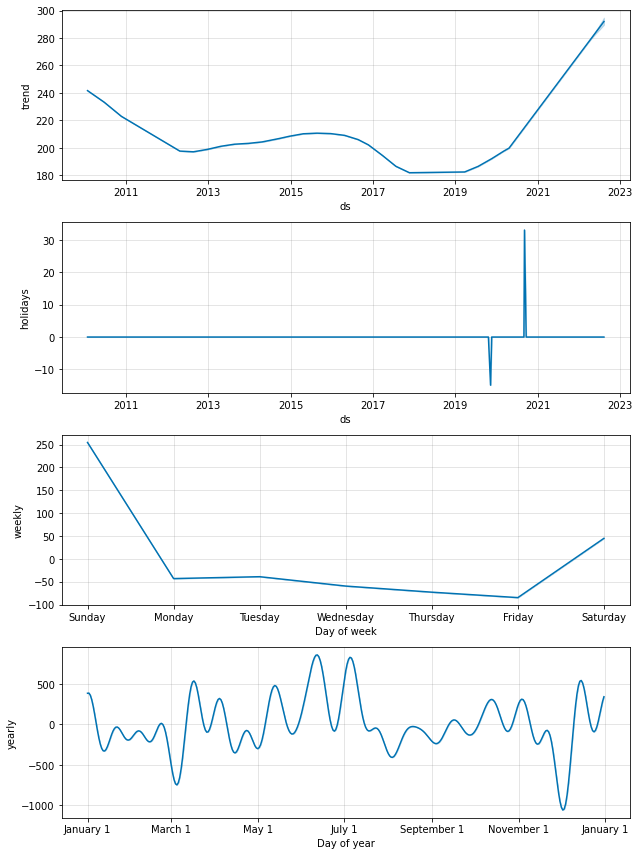

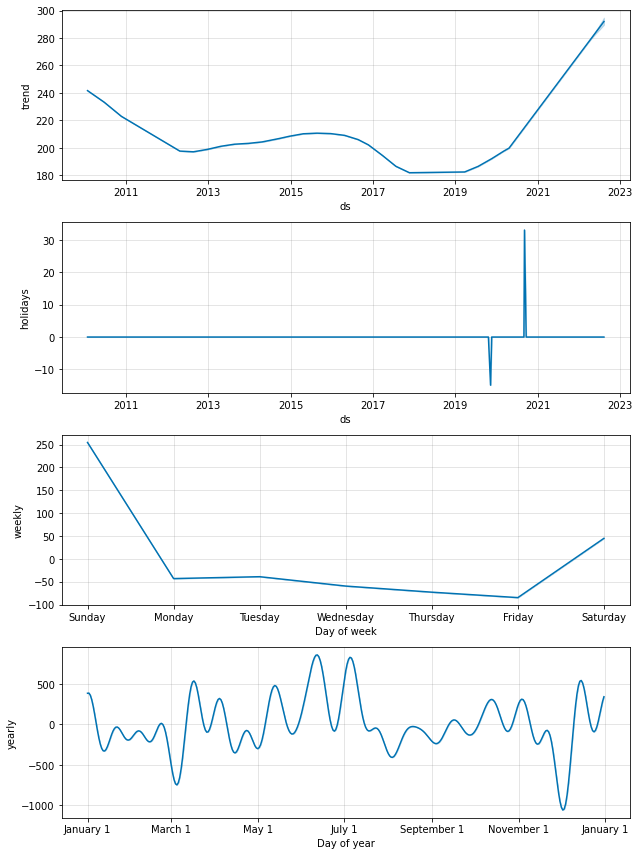

In [ ]:
m.plot_components(prediction)

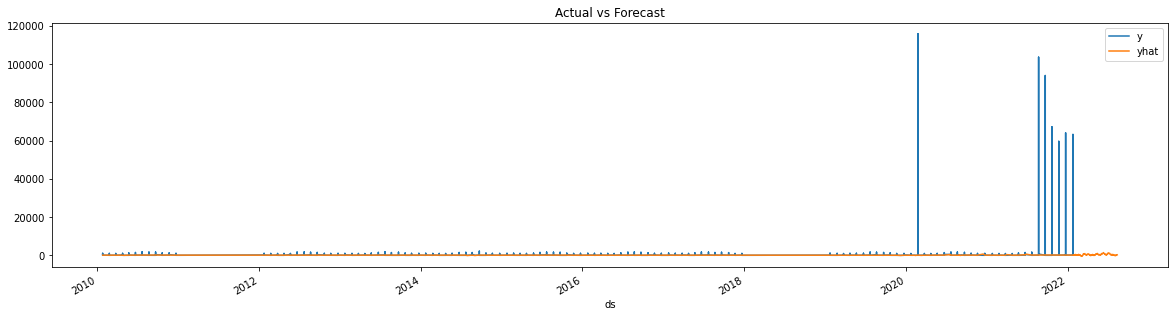

In [ ]:
ax = (df.plot(x='ds',y='y',figsize=(20,5),title='Actual Vs Forecast'))
prediction.plot(x='ds',y='yhat',figsize=(20,5),title='Actual vs Forecast', ax=ax)

In [ ]:
forecast = m.predict(future_dates_day)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat   yhat_lower   yhat_upper
338 2022-08-09  -10.831915 -1066.689525   969.299814
339 2022-08-10   13.708692 -1032.297878  1122.953306
340 2022-08-11   43.952508 -1012.616838  1009.845397
341 2022-08-12   71.910153  -967.453815  1131.683243
342 2022-08-13  235.948210  -825.691567  1317.087397

In [ ]:
fig1 = m.plot(forecast) 
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast) 
plt.show()

##365 Days

In [ ]:
future_dates_day = m.make_future_dataframe(periods=1*365)

In [ ]:
prediction = m.predict(future_dates_day)

In [ ]:
prediction.tail(20)

ds       trend   yhat_lower   yhat_upper  trend_lower  \
488 2023-01-06  307.967224  -627.517839  1486.610999   300.294785   
489 2023-01-07  308.076701  -681.827117  1475.678643   300.341900   
490 2023-01-08  308.186179  -559.019301  1680.187353   300.391067   
491 2023-01-09  308.295657  -892.267089  1296.851759   300.450309   
492 2023-01-10  308.405134 -1086.069027  1047.554296   300.483930   
493 2023-01-11  308.514612 -1044.014751  1094.511636   300.543976   
494 2023-01-12  308.624089 -1194.006038  1035.417159   300.616516   
495 2023-01-13  308.733567 -1155.309169   926.561162   300.689939   
496 2023-01-14  308.843045 -1061.155547  1093.100897   300.764714   
497 2023-01-15  308.952522  -738.169316  1364.723952   300.839488   
498 2023-01-16  309.062000 -1061.688836  1101.047312   300.914263   
499 2023-01-17  309.171477  -961.562778  1082.551917   300.989338   
500 2023-01-18  309.280955  -906.426709  1182.977397   301.070956   
501 2023-01-19  309.390432  -977.655980  1210.355519   301.152575   
502 2023-01-20  309.499910  -773.224448  1230.254505   301.234193   
503 2023-01-21  309.609388  -797.721273  1394.422174   301.314526   
504 2023-01-22  309.718865  -550.167977  1547.754101   301.380346   
505 2023-01-23  309.828343  -792.568652  1318.580889   301.446165   
506 2023-01-24  309.937820  -813.445878  1243.116037   301.511985   
507 2023-01-25  310.047298  -959.371358  1210.206400   301.580073   

     trend_upper  Christmas Day  Christmas Day_lower  Christmas Day_upper  \
488   314.136402            0.0                  0.0                  0.0   
489   314.275892            0.0                  0.0                  0.0   
490   314.406526            0.0                  0.0                  0.0   
491   314.548599            0.0                  0.0                  0.0   
492   314.712377            0.0                  0.0                  0.0   
493   314.858833            0.0                  0.0                  0.0   
494   315.002183            0.0                  0.0                  0.0   
495   315.145534            0.0                  0.0                  0.0   
496   315.288885            0.0                  0.0                  0.0   
497   315.432236            0.0                  0.0                  0.0   
498   315.575586            0.0                  0.0                  0.0   
499   315.716319            0.0                  0.0                  0.0   
500   315.850162            0.0                  0.0                  0.0   
501   316.002102            0.0                  0.0                  0.0   
502   316.145766            0.0                  0.0                  0.0   
503   316.280711            0.0                  0.0                  0.0   
504   316.430464            0.0                  0.0                  0.0   
505   316.566282            0.0                  0.0                  0.0   
506   316.714701            0.0                  0.0                  0.0   
507   316.849568            0.0                  0.0                  0.0   

     Christmas Day (Observed)  ...      weekly  weekly_lower  weekly_upper  \
488                       0.0  ...  -84.816741    -84.816741    -84.816741   
489                       0.0  ...   44.905703     44.905703     44.905703   
490                       0.0  ...  254.696845    254.696845    254.696845   
491                       0.0  ...  -43.181720    -43.181720    -43.181720   
492                       0.0  ...  -39.068521    -39.068521    -39.068521   
493                       0.0  ...  -59.580747    -59.580747    -59.580747   
494                       0.0  ...  -72.954819    -72.954819    -72.954819   
495                       0.0  ...  -84.816741    -84.816741    -84.816741   
496                       0.0  ...   44.905703     44.905703     44.905703   
497                       0.0  ...  254.696845    254.696845    254.696845   
498                       0.0  ...  -43.181720    -43.181720    -43.181720   
499     

In [ ]:
import matplotlib.pyplot as plt
m.plot(prediction)
plt.show()

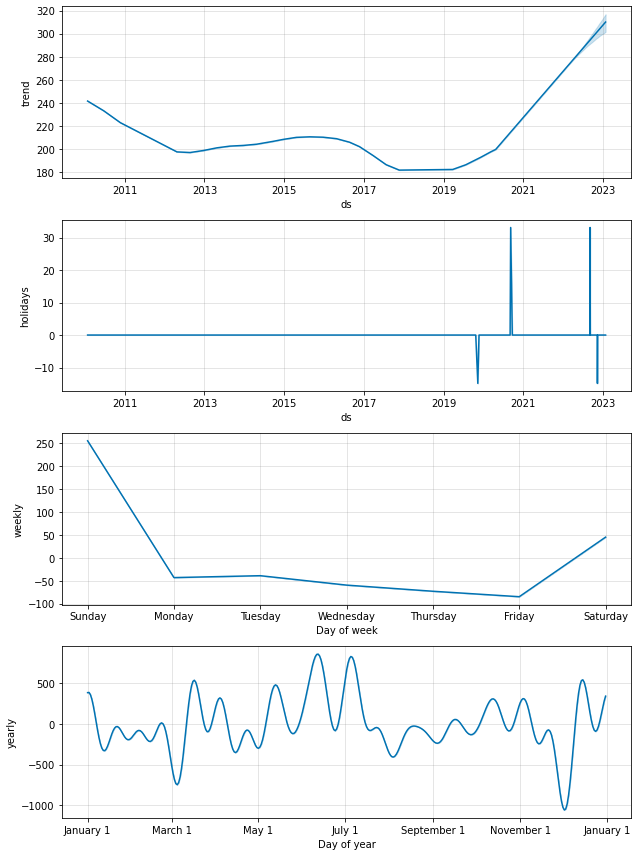

In [ ]:
m.plot_components(prediction)

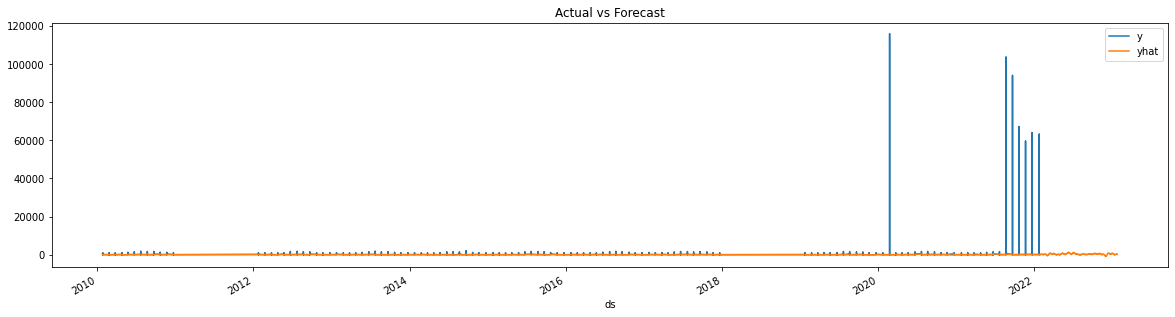

In [ ]:
ax = (df.plot(x='ds',y='y',figsize=(20,5),title='Actual Vs Forecast'))
prediction.plot(x='ds',y='yhat',figsize=(20,5),title='Actual vs Forecast', ax=ax)

In [ ]:
forecast = m.predict(future_dates_day)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower   yhat_upper
503 2023-01-21  315.771322 -655.859300  1377.642564
504 2023-01-22  534.312809 -450.770722  1602.449593
505 2023-01-23  230.496079 -831.278781  1298.429663
506 2023-01-24  216.277763 -901.128302  1249.814350
507 2023-01-25  168.753774 -919.594981  1132.262305

##Cross Days

In [ ]:
## import prophet eval tools

from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

# Define:

# Initial -- period is 5 years

initial = 5 * 365
initial = str(initial) + ' days'

# Define:

# Period

period = 5 * 365
period = str(period) + ' days'


horizon = 365
horizon = str(horizon) + ' days'

# perform cross-validation -- args: model, initial, period, horizon

df_cv = cross_validation(m, initial=initial, period=period, horizon=horizon)

INFO:prophet:Making 2 forecasts with cutoffs between 2016-01-27 00:00:00 and 2021-01-25 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpqgf1dy0i/vtp8yo4i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqgf1dy0i/_lnfy0n6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87083', 'data', 'file=/tmp/tmpqgf1dy0i/vtp8yo4i.json', 'init=/tmp/tmpqgf1dy0i/_lnfy0n6.json', 'output', 'file=/tmp/tmpqgf1dy0i/prophet_model3n_6a73q/prophet_model-20221215001058.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:10:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:11:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqgf1dy0i/k5xs0s5f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqgf1dy0i/8ci6z39h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

In [ ]:
df_cv.head()

ds       yhat  yhat_lower  yhat_upper       y     cutoff
0 2016-02-25  53.518605 -107.233798  205.063204   66.48 2016-01-27
1 2016-02-25  53.518605  -96.719904  195.829972  240.00 2016-01-27
2 2016-02-25  53.518605  -96.932354  207.782762   60.62 2016-01-27
3 2016-02-25  53.518605 -103.580367  213.769608   13.60 2016-01-27
4 2016-02-25  53.518605  -90.015052  207.344139  312.00 2016-01-27

In [ ]:
performance_metrics(df_cv)

INFO:prophet:Skipping MAPE because y close to 0


horizon           mse         rmse         mae     mdape     smape  \
0   29 days  8.000958e+03    89.448074   60.091709  1.701292  1.222013   
1   31 days  7.699650e+03    87.747647   58.777581  1.776765  1.229576   
2   58 days  7.476553e+03    86.467064   58.341284  2.142539  1.225077   
3   60 days  7.241663e+03    85.097960   55.996471  1.828285  1.235189   
4   66 days  7.335016e+03    85.644706   56.185564  1.828285  1.235533   
5   89 days  7.600937e+03    87.183354   55.765433  1.293356  1.240229   
6   91 days  7.021226e+03    83.792759   54.231267  1.293356  1.236977   
7  118 days  7.248371e+03    85.137365   56.257106  1.559393  1.220568   
8  119 days  8.234474e+03    90.744004   60.920975  2.108174  1.221069   
9  147 days  8.248015e+03    90.818582   60.985176  2.132853  1.221382   
10 148 days  1.128369e+04   106.224717   70.387122  1.820668  1.229649   
11 149 days  1.401629e+04   118.390394   79.428766  1.958796  1.240393   
12 153 days  1.401196e+04   118.372122   79.413183  1.958796  1.239831   
13 179 days  1.712076e+04   130.846330   88.950091  3.158611  1.244720   
14 180 days  1.980584e+04   140.733219   94.883028  1.633204  1.245356   
15 209 days  2.268217e+04   150.606010   99.454069  1.918787  1.249180   
16 210 days  5.254651e+06  2292.302637  148.753539  1.961202  1.246032   
17 239 days  5.253842e+06  2292.125990  146.884111  2.092325  1.245889   
18 240 days  7.973796e+06  2823.791151  174.953090  3.103721  1.241223   
19 270 days  6.524636e+06  2554.336801  163.008775  2.571941  1.235041   
20 271 days  5.226905e+06  2286.242469  141.463612  1.645240  1.260721   
21 300 days  1.547721e+06  1244.074187   90.996875  1.512424  1.258788   
22 301 days  1.748931e+06  1322.471405   96.663947  1.683711  1.245018   
23 331 days  1.747511e+06  1321.934498   93.137100  2.138504  1.225689   
24 332 days  3.220882e+06  1794.681680  113.883846  2.287956  1.221861   
25 364 days  2.005568e+06  1416.180881   91.307701  1.707729  1.229976   
26 365 days  3.350921e+06  1830.552202  116.788167  2.324376  1.223436   

    coverage  
0   0.978651  
1   0.984615  
2   0.981094  
3   0.981094  
4   0.981094  
5   0.968326  
6   0.980605  
7   0.971356  
8   0.984024  
9   0.984025  
10  0.967442  
11  0.977185  
12  0.977186  
13  0.983008  
14  0.972938  
15  0.942162  
16  0.949076  
17  0.951042  
18  0.972110  
19  0.979320  
20  0.973084  
21  0.955987  
22  0.962914  
23  0.966519  
24  0.978946  
25  0.967155  
26  0.979776

/usr/local/lib/python3.8/dist-packages/prophet/plot.py:544: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/usr/local/lib/python3.8/dist-packages/prophet/plot.py:545: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



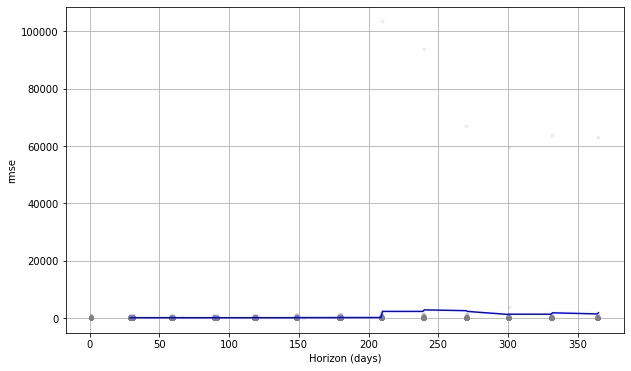

In [ ]:
# plot rmse
plot_cross_validation_metric(df_cv, metric='rmse');

##1 Month

In [ ]:
future_dates_day = m.make_future_dataframe(periods=30*1)

In [ ]:
prediction = m.predict(future_dates_day)

In [ ]:
prediction.tail(20)

ds       trend   yhat_lower   yhat_upper  trend_lower  \
153 2022-02-05  271.292233  -917.943449  1238.751238   271.292233   
154 2022-02-06  271.401711  -620.116752  1457.643691   271.401711   
155 2022-02-07  271.511189  -849.266070  1218.449012   271.511189   
156 2022-02-08  271.620666  -929.184121  1073.109015   271.620666   
157 2022-02-09  271.730144  -951.173892  1199.108990   271.730144   
158 2022-02-10  271.839621 -1045.072876  1129.613739   271.839621   
159 2022-02-11  271.949099 -1049.235964  1141.281858   271.949099   
160 2022-02-12  272.058576  -976.257079  1177.660379   272.058576   
161 2022-02-13  272.168054  -666.666438  1372.625780   272.168054   
162 2022-02-14  272.277532 -1039.059653  1106.157896   272.277532   
163 2022-02-15  272.387009  -990.306080  1128.412024   272.387009   
164 2022-02-16  272.496487 -1008.709849  1110.965136   272.496487   
165 2022-02-17  272.605964 -1020.631867  1123.679253   272.605964   
166 2022-02-18  272.715442 -1023.842592  1184.639558   272.715442   
167 2022-02-19  272.824920  -802.804110  1232.402111   272.824920   
168 2022-02-20  272.934397  -583.685545  1588.824265   272.934397   
169 2022-02-21  273.043875  -856.739298  1244.458935   273.043875   
170 2022-02-22  273.153352  -790.277396  1313.505287   273.153352   
171 2022-02-23  273.262830  -866.687124  1276.884077   273.262830   
172 2022-02-24  273.372307  -795.309625  1180.918122   273.372307   

     trend_upper  Christmas Day  Christmas Day_lower  Christmas Day_upper  \
153   271.292233            0.0                  0.0                  0.0   
154   271.401711            0.0                  0.0                  0.0   
155   271.511189            0.0                  0.0                  0.0   
156   271.620666            0.0                  0.0                  0.0   
157   271.730144            0.0                  0.0                  0.0   
158   271.839621            0.0                  0.0                  0.0   
159   271.949099            0.0                  0.0                  0.0   
160   272.058576            0.0                  0.0                  0.0   
161   272.168054            0.0                  0.0                  0.0   
162   272.277532            0.0                  0.0                  0.0   
163   272.387009            0.0                  0.0                  0.0   
164   272.496487            0.0                  0.0                  0.0   
165   272.605964            0.0                  0.0                  0.0   
166   272.715442            0.0                  0.0                  0.0   
167   272.824920            0.0                  0.0                  0.0   
168   272.934397            0.0                  0.0                  0.0   
169   273.043875            0.0                  0.0                  0.0   
170   273.153352            0.0                  0.0                  0.0   
171   273.262830            0.0                  0.0                  0.0   
172   273.372307            0.0                  0.0                  0.0   

     Christmas Day (Observed)  ...      weekly  weekly_lower  weekly_upper  \
153                       0.0  ...   44.905703     44.905703     44.905703   
154                       0.0  ...  254.696845    254.696845    254.696845   
155                       0.0  ...  -43.181720    -43.181720    -43.181720   
156                       0.0  ...  -39.068521    -39.068521    -39.068521   
157                       0.0  ...  -59.580747    -59.580747    -59.580747   
158                       0.0  ...  -72.954819    -72.954819    -72.954819   
159                       0.0  ...  -84.816741    -84.816741    -84.816741   
160                       0.0  ...   44.905703     44.905703     44.905703   
161                       0.0  ...  254.696845    254.696845    254.696845   
162                       0.0  ...  -43.181720    -43.181720    -43.181720   
163                       0.0  ...  -39.068521    -39.068521    -39.068521   
164     

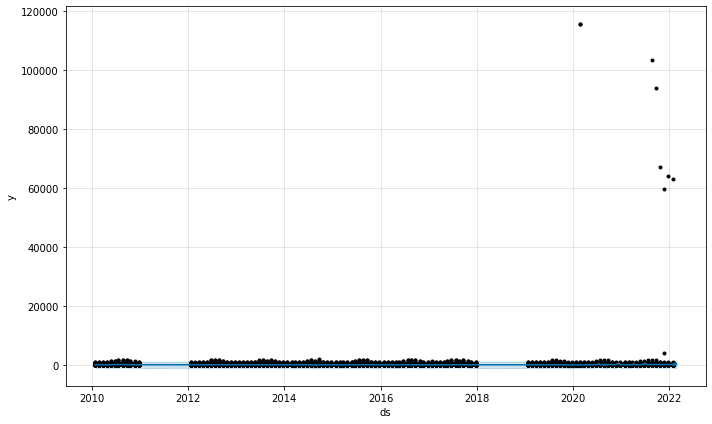

In [ ]:
import matplotlib.pyplot as plt
m.plot(prediction)
plt.show()

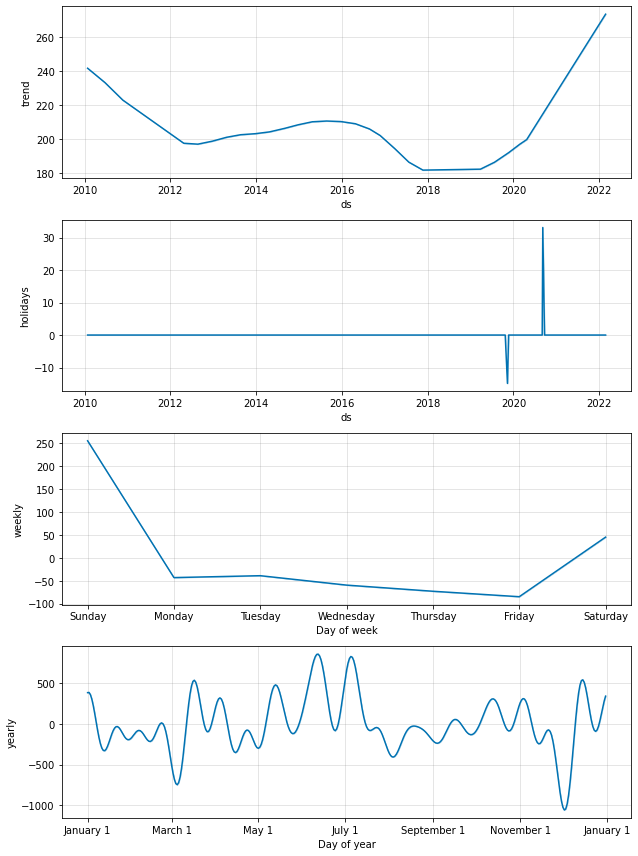

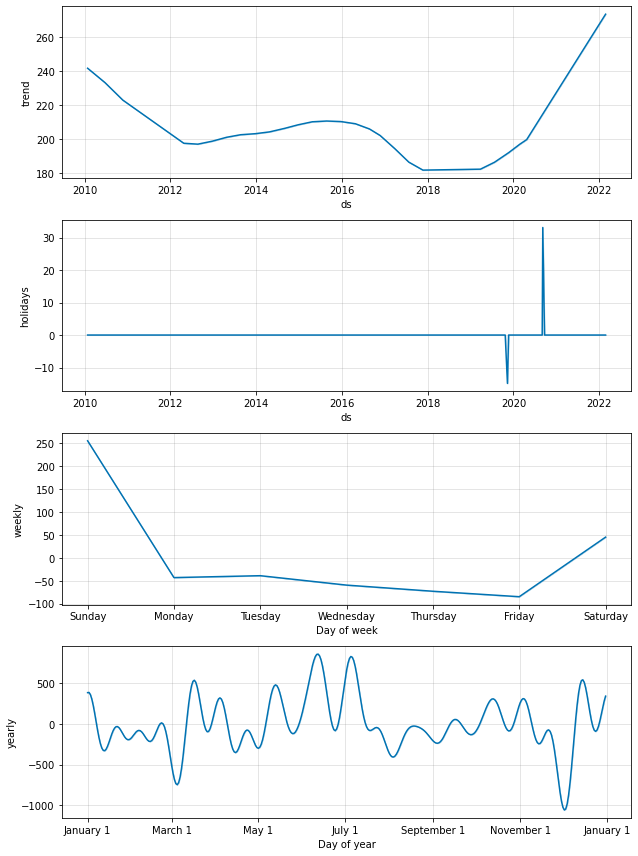

In [ ]:
m.plot_components(prediction)

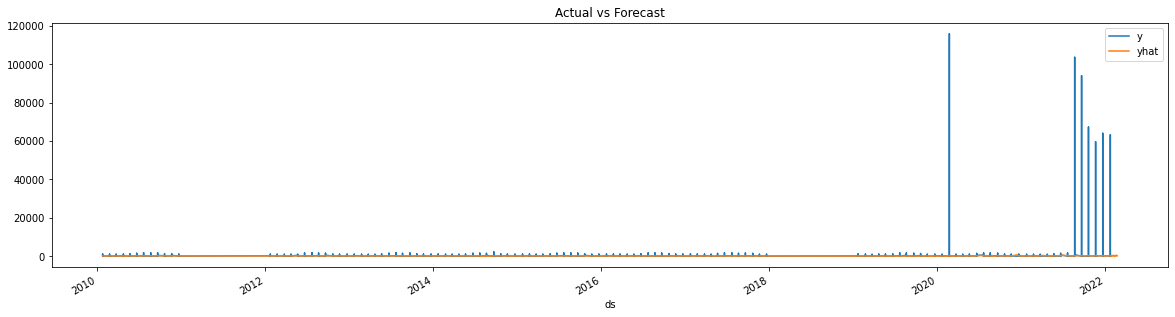

In [ ]:
ax = (df.plot(x='ds',y='y',figsize=(20,5),title='Actual Vs Forecast'))
prediction.plot(x='ds',y='yhat',figsize=(20,5),title='Actual vs Forecast', ax=ax)

In [ ]:
forecast = m.predict(future_dates_day)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower   yhat_upper
168 2022-02-20  495.018510 -525.455805  1484.244996
169 2022-02-21  228.392501 -805.992970  1295.570408
170 2022-02-22  247.840513 -855.544444  1293.453476
171 2022-02-23  221.544059 -812.624857  1268.922014
172 2022-02-24  177.955225 -862.231440  1314.356000

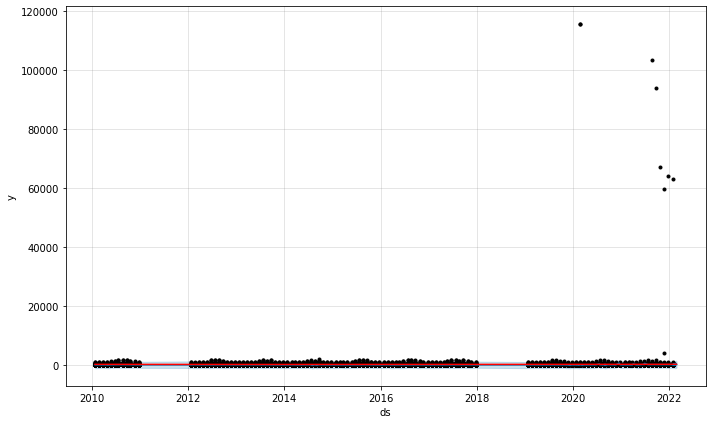

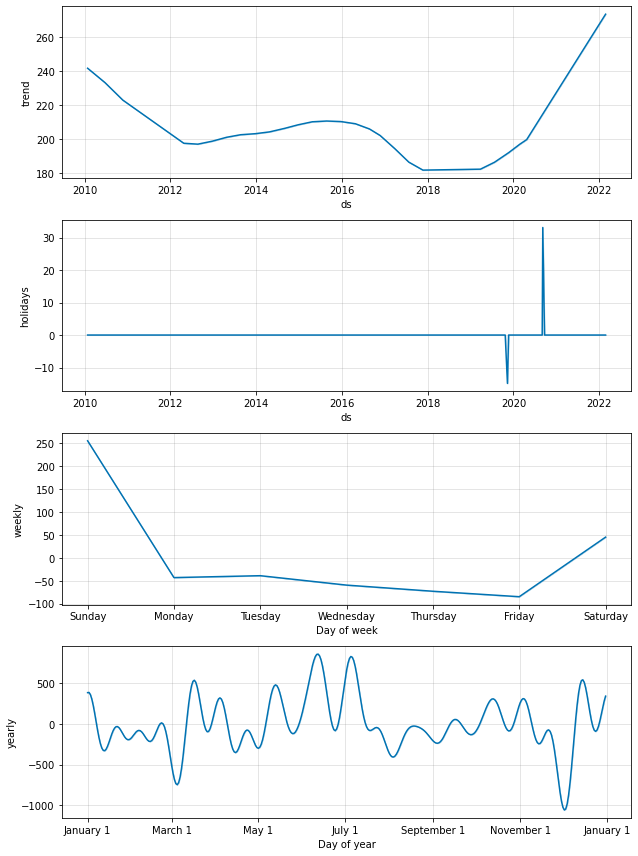

In [ ]:
fig1 = m.plot(forecast) 
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast) 
plt.show()

##6 Months

In [ ]:
future_dates_day = m.make_future_dataframe(periods=30*6)

In [ ]:
prediction = m.predict(future_dates_day)

In [ ]:
prediction.tail(20)

ds       trend  yhat_lower   yhat_upper  trend_lower  trend_upper  \
303 2022-07-05  287.713871   57.555050  1980.565869   285.826078   289.365176   
304 2022-07-06  287.823348   27.974232  2074.685298   285.919072   289.497971   
305 2022-07-07  287.932826 -130.414825  2063.275871   286.016082   289.624679   
306 2022-07-08  288.042304 -131.843997  2028.199506   286.109893   289.744081   
307 2022-07-09  288.151781 -165.864933  2007.557502   286.203983   289.858212   
308 2022-07-10  288.261259  -11.681245  2074.631766   286.295254   289.981471   
309 2022-07-11  288.370736 -361.054100  1741.711220   286.381722   290.121624   
310 2022-07-12  288.480214 -565.678702  1580.146900   286.471484   290.264378   
311 2022-07-13  288.589692 -607.176579  1509.075462   286.564403   290.412140   
312 2022-07-14  288.699169 -730.582493  1278.853807   286.658286   290.554642   
313 2022-07-15  288.808647 -863.385599  1332.619217   286.752304   290.681560   
314 2022-07-16  288.918124 -748.160952  1386.674368   286.841903   290.804170   
315 2022-07-17  289.027602 -634.587282  1515.421845   286.935245   290.902873   
316 2022-07-18  289.137079 -944.377247  1258.693812   287.003097   291.034122   
317 2022-07-19  289.246557 -873.264758  1178.825881   287.084491   291.152118   
318 2022-07-20  289.356035 -902.773142  1283.378952   287.179777   291.273218   
319 2022-07-21  289.465512 -861.257224  1218.585638   287.275271   291.426412   
320 2022-07-22  289.574990 -908.710304  1229.910189   287.357714   291.566967   
321 2022-07-23  289.684467 -740.996018  1380.871831   287.435344   291.692895   
322 2022-07-24  289.793945 -689.982222  1553.733951   287.513351   291.818824   

     Christmas Day  Christmas Day_lower  Christmas Day_upper  \
303            0.0                  0.0                  0.0   
304            0.0                  0.0                  0.0   
305            0.0                  0.0                  0.0   
306            0.0                  0.0                  0.0   
307            0.0                  0.0                  0.0   
308            0.0                  0.0                  0.0   
309            0.0                  0.0                  0.0   
310            0.0                  0.0                  0.0   
311            0.0                  0.0                  0.0   
312            0.0                  0.0                  0.0   
313            0.0                  0.0                  0.0   
314            0.0                  0.0                  0.0   
315            0.0                  0.0                  0.0   
316            0.0                  0.0                  0.0   
317            0.0                  0.0                  0.0   
318            0.0                  0.0                  0.0   
319            0.0                  0.0                  0.0   
320            0.0                  0.0                  0.0   
321            0.0                  0.0                  0.0   
322            0.0                  0.0                  0.0   

     Christmas Day (Observed)  ...      weekly  weekly_lower  weekly_upper  \
303                       0.0  ...  -39.068521    -39.068521    -39.068521   
304                       0.0  ...  -59.580747    -59.580747    -59.580747   
305                       0.0  ...  -72.954819    -72.954819    -72.954819   
306                       0.0  ...  -84.816741    -84.816741    -84.816741   
307                       0.0  ...   44.905703     44.905703     44.905703   
308                       0.0  ...  254.696845    254.696845    254.696845   
309                       0.0  ...  -43.181720    -43.181720    -43.181720   
310                       0.0  ...  -39.068521    -39.068521    -39.068521   
311                       0.0  ...  -59.580747    -59.580747    -59.580747   
312                       0.0  ...  -72.954819    -72.954819    -72.954819   
313                       0.0  ...  -84.816741    -84.816741    -84.816741   
314                       0.0

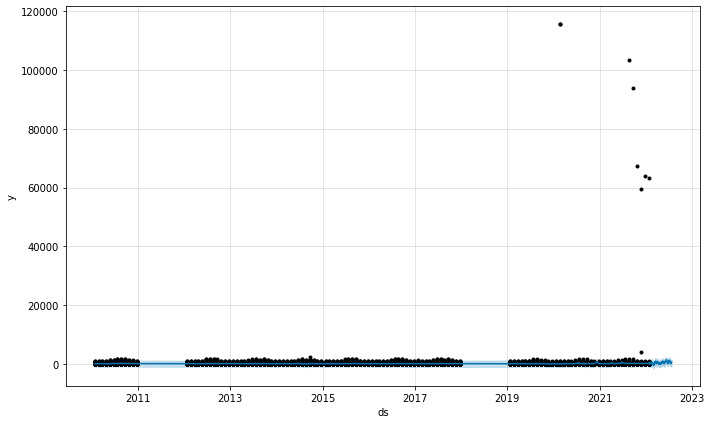

In [ ]:
import matplotlib.pyplot as plt
m.plot(prediction)
plt.show()

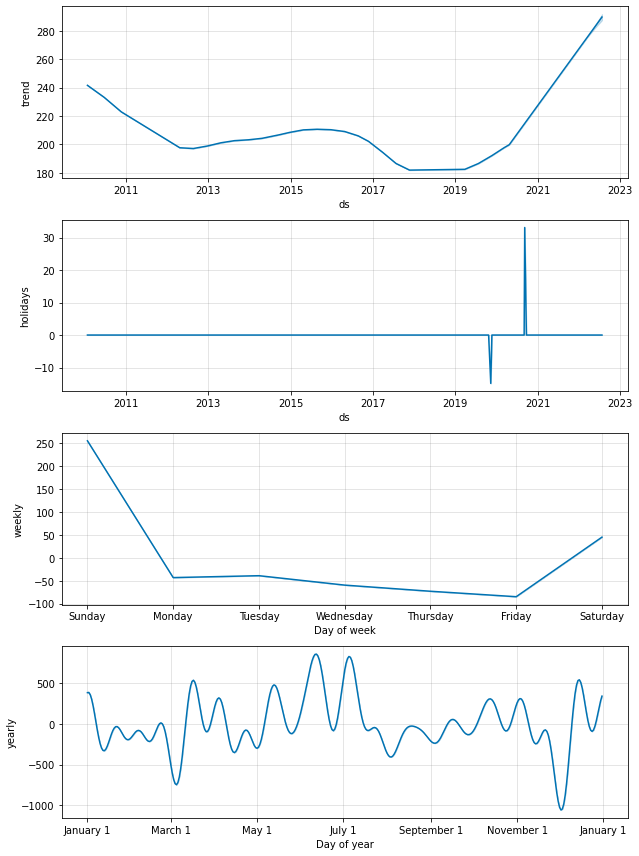

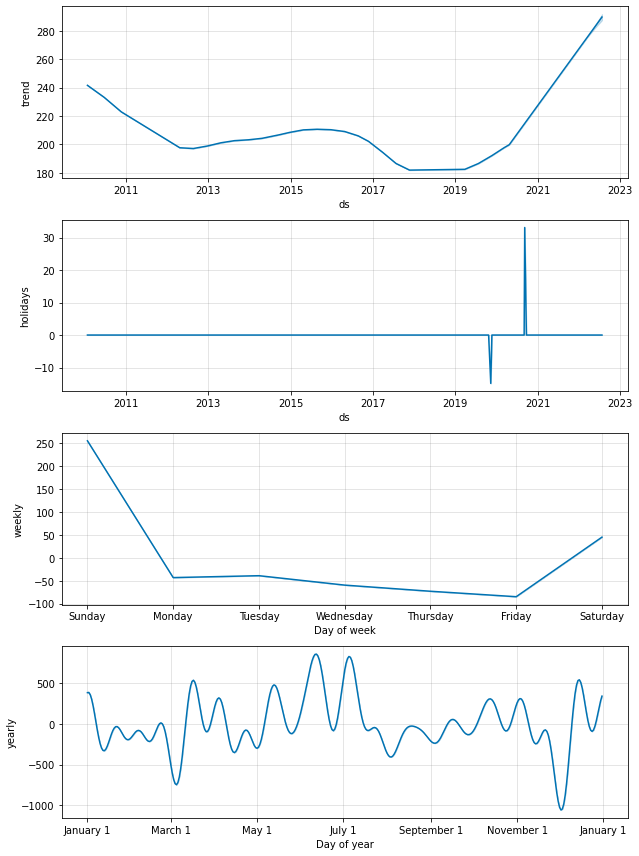

In [ ]:
m.plot_components(prediction)

In [ ]:
ax = (df.plot(x='ds',y='y',figsize=(20,5),title='Actual Vs Forecast'))
prediction.plot(x='ds',y='yhat',figsize=(20,5),title='Actual vs Forecast', ax=ax)

In [ ]:
forecast = m.predict(future_dates_day)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower   yhat_upper
318 2022-07-20  156.810918 -855.228611  1238.562171
319 2022-07-21  155.424217 -855.176928  1253.757771
320 2022-07-22  155.250687 -956.413465  1184.229510
321 2022-07-23  291.664778 -708.692667  1383.047250
322 2022-07-24  499.494319 -571.442792  1539.733880

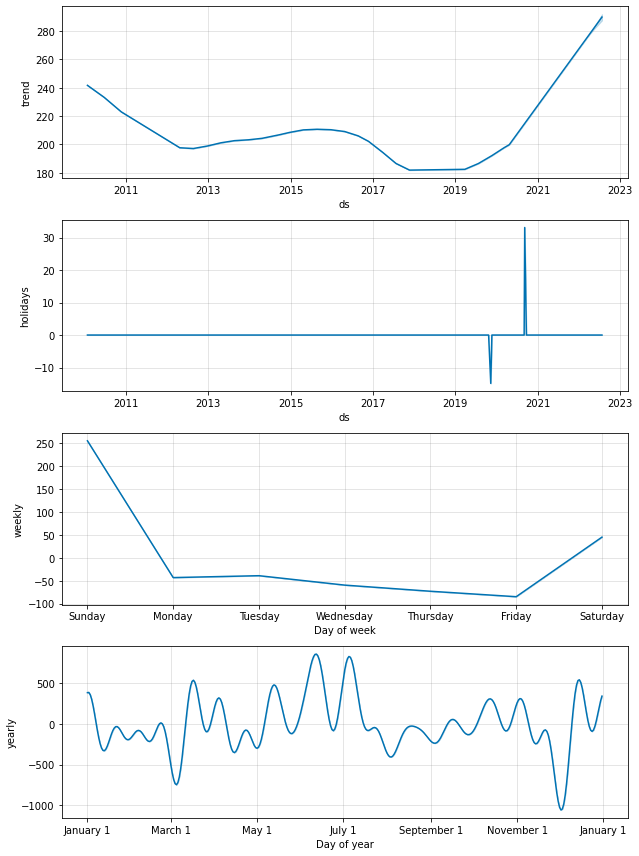

In [ ]:
fig1 = m.plot(forecast) 
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast) 
plt.show()

##9 Months

In [ ]:
future_dates_day = m.make_future_dataframe(periods=30*9)

In [ ]:
prediction = m.predict(future_dates_day)

In [ ]:
prediction.tail(20)

ds       trend  yhat_lower   yhat_upper  trend_lower  trend_upper  \
393 2022-10-03  297.566853 -839.290168  1349.802346   293.424614   301.208780   
394 2022-10-04  297.676331 -761.270741  1342.751815   293.510350   301.353423   
395 2022-10-05  297.785809 -787.850494  1366.585935   293.596086   301.514906   
396 2022-10-06  297.895286 -788.966576  1479.845732   293.682185   301.673286   
397 2022-10-07  298.004764 -757.222547  1394.262609   293.770497   301.819025   
398 2022-10-08  298.114241 -568.354046  1672.227430   293.858809   301.959087   
399 2022-10-09  298.223719 -267.623323  1853.493698   293.947121   302.089719   
400 2022-10-10  298.333197 -512.413827  1620.973356   294.052221   302.220264   
401 2022-10-11  298.442674 -575.198345  1660.012438   294.141274   302.349111   
402 2022-10-12  298.552152 -508.047663  1509.768033   294.222081   302.477958   
403 2022-10-13  298.661629 -558.761264  1604.076450   294.302888   302.633769   
404 2022-10-14  298.771107 -490.446889  1630.501311   294.383695   302.800800   
405 2022-10-15  298.880584 -468.596511  1686.774862   294.464502   302.937485   
406 2022-10-16  298.990062 -284.053604  1918.194511   294.549912   303.086806   
407 2022-10-17  299.099540 -640.802827  1582.718346   294.634109   303.238508   
408 2022-10-18  299.209017 -609.315223  1509.458645   294.715259   303.390209   
409 2022-10-19  299.318495 -830.545577  1329.633905   294.796409   303.541910   
410 2022-10-20  299.427972 -847.748791  1343.864839   294.877560   303.693612   
411 2022-10-21  299.537450 -870.338777  1246.010020   294.953652   303.820797   
412 2022-10-22  299.646928 -726.778990  1265.332216   295.023026   303.934289   

     Christmas Day  Christmas Day_lower  Christmas Day_upper  \
393            0.0                  0.0                  0.0   
394            0.0                  0.0                  0.0   
395            0.0                  0.0                  0.0   
396            0.0                  0.0                  0.0   
397            0.0                  0.0                  0.0   
398            0.0                  0.0                  0.0   
399            0.0                  0.0                  0.0   
400            0.0                  0.0                  0.0   
401            0.0                  0.0                  0.0   
402            0.0                  0.0                  0.0   
403            0.0                  0.0                  0.0   
404            0.0                  0.0                  0.0   
405            0.0                  0.0                  0.0   
406            0.0                  0.0                  0.0   
407            0.0                  0.0                  0.0   
408            0.0                  0.0                  0.0   
409            0.0                  0.0                  0.0   
410            0.0                  0.0                  0.0   
411            0.0                  0.0                  0.0   
412            0.0                  0.0                  0.0   

     Christmas Day (Observed)  ...      weekly  weekly_lower  weekly_upper  \
393                       0.0  ...  -43.181720    -43.181720    -43.181720   
394                       0.0  ...  -39.068521    -39.068521    -39.068521   
395                       0.0  ...  -59.580747    -59.580747    -59.580747   
396                       0.0  ...  -72.954819    -72.954819    -72.954819   
397                       0.0  ...  -84.816741    -84.816741    -84.816741   
398                       0.0  ...   44.905703     44.905703     44.905703   
399                       0.0  ...  254.696845    254.696845    254.696845   
400                       0.0  ...  -43.181720    -43.181720    -43.181720   
401                       0.0  ...  -39.068521    -39.068521    -39.068521   
402                       0.0  ...  -59.580747    -59.580747    -59.580747   
403                       0.0  ...  -72.954819    -72.954819    -72.954819   
404                       0.0

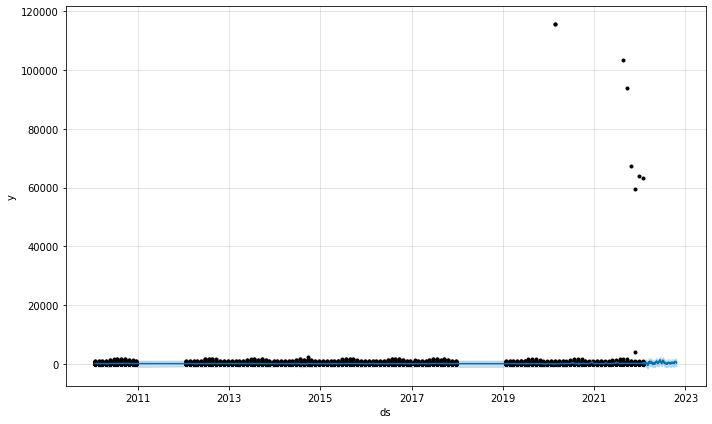

In [ ]:
import matplotlib.pyplot as plt
m.plot(prediction)
plt.show()

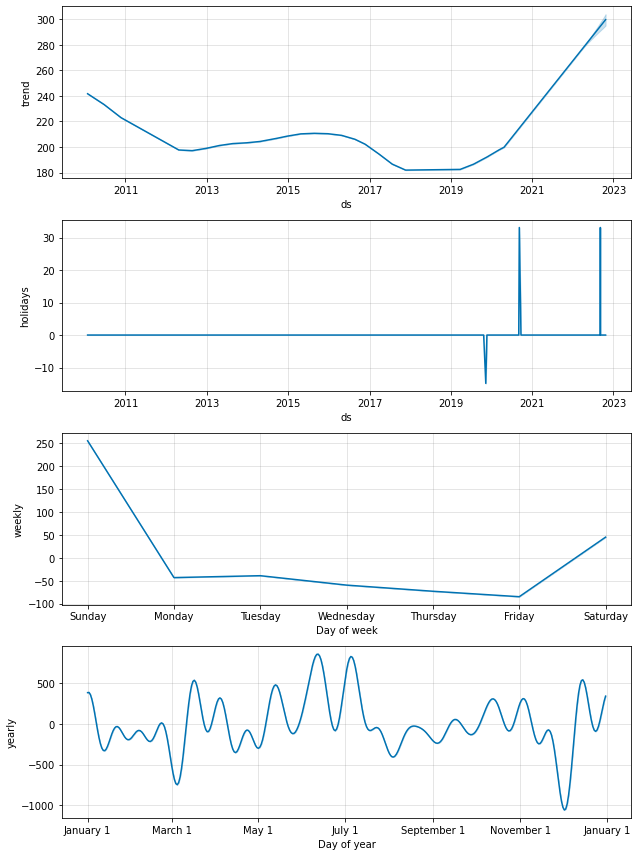

In [ ]:
m.plot_components(prediction)

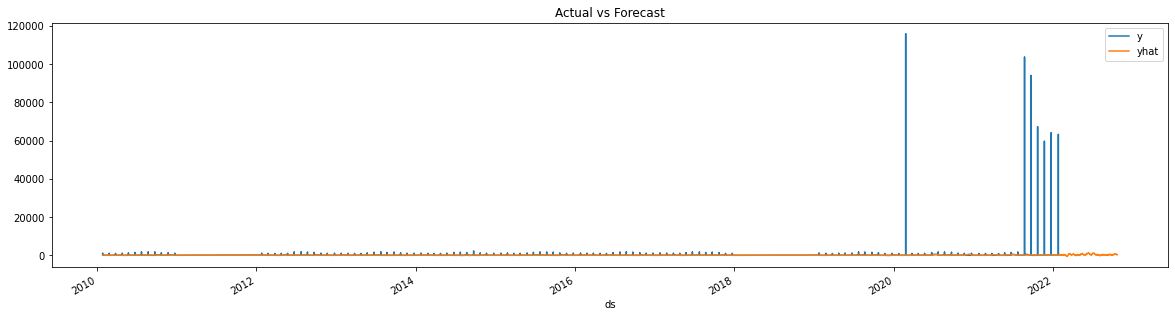

In [ ]:
ax = (df.plot(x='ds',y='y',figsize=(20,5),title='Actual Vs Forecast'))
prediction.plot(x='ds',y='yhat',figsize=(20,5),title='Actual vs Forecast', ax=ax)

In [ ]:
forecast = m.predict(future_dates_day)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower   yhat_upper
408 2022-10-18  424.949081 -622.162571  1516.411374
409 2022-10-19  350.627032 -737.880315  1395.451601
410 2022-10-20  282.762771 -684.953276  1394.715194
411 2022-10-21  220.095361 -841.915633  1258.133156
412 2022-10-22  307.048577 -807.173401  1361.182606

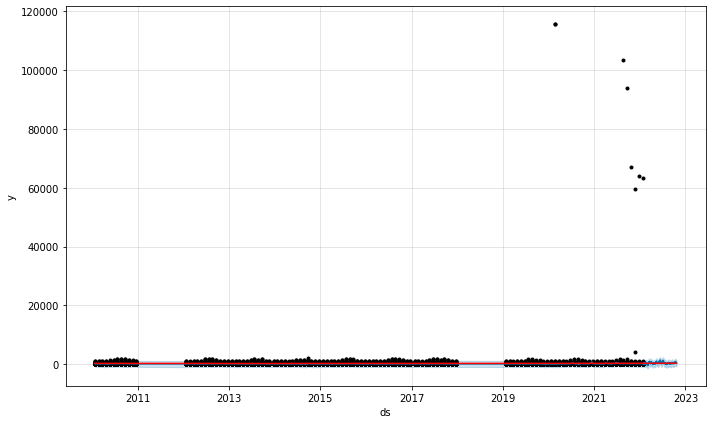

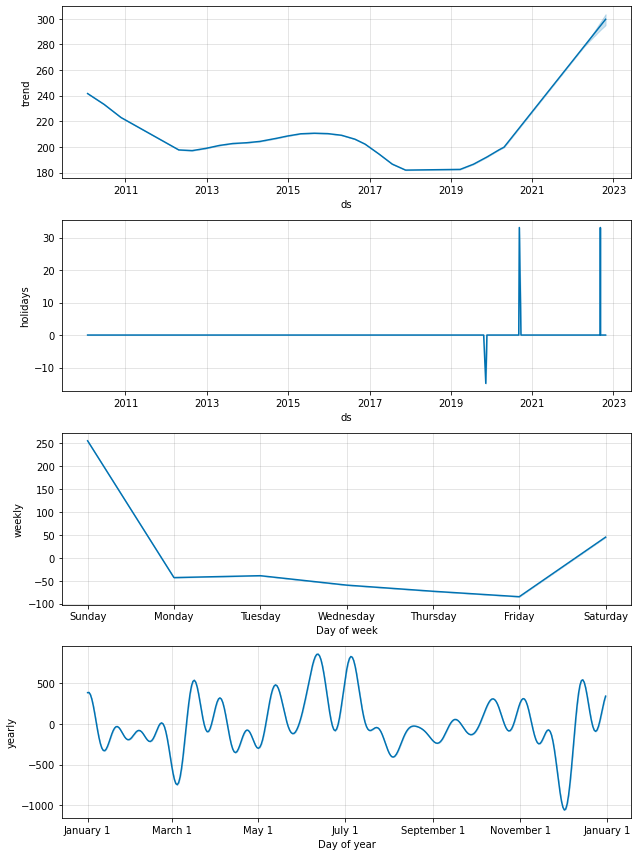

In [ ]:
fig1 = m.plot(forecast) 
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast) 
plt.show()

##Cross Months

In [ ]:
## import prophet eval tools

from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

# Define:

# Initial -- period is 5 years

initial = 5 * 365
initial = str(initial) + ' days'

# Define:

# Period

period = 9 * 30
period = str(period) + ' days'


horizon = 270
horizon = str(horizon) + ' days'

# perform cross-validation -- args: model, initial, period, horizon

df_cv = cross_validation(m, initial=initial, period=period, horizon=horizon)

INFO:prophet:Making 9 forecasts with cutoffs between 2015-06-01 00:00:00 and 2021-04-30 00:00:00


  0%|          | 0/9 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpqgf1dy0i/29m2b_vq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqgf1dy0i/jz7lte60.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1020', 'data', 'file=/tmp/tmpqgf1dy0i/29m2b_vq.json', 'init=/tmp/tmpqgf1dy0i/jz7lte60.json', 'output', 'file=/tmp/tmpqgf1dy0i/prophet_model22argl6c/prophet_model-20221215001204.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:12:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:12:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqgf1dy0i/zvgmndvu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqgf1dy0i/_67huszd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/li

In [ ]:
df_cv.head()

ds       yhat  yhat_lower  yhat_upper      y     cutoff
0 2015-06-24  82.498742  -71.520196  232.875638    0.0 2015-06-01
1 2015-06-24  82.498742  -75.855194  234.826402    0.0 2015-06-01
2 2015-06-24  82.498742  -61.144756  236.568879  159.2 2015-06-01
3 2015-06-24  82.498742  -77.213510  226.904163    0.0 2015-06-01
4 2015-06-24  82.498742  -64.144046  239.768651    0.0 2015-06-01

In [ ]:
performance_metrics(df_cv)

INFO:prophet:Skipping MAPE because y close to 0


horizon            mse        rmse        mae     mdape     smape  \
0   31 days   12272.324267  110.780523  71.395686  1.716214  1.242518   
1   32 days   12275.540040  110.795036  71.430788  1.731326  1.242887   
2   33 days   13582.167255  116.542556  74.600942  1.808981  1.244562   
3   35 days   13585.191505  116.555530  74.618462  1.808981  1.244561   
4   44 days   13507.488764  116.221722  74.476753  1.884824  1.242735   
..      ...            ...         ...        ...       ...       ...   
60 256 days  744383.408947  862.776570  81.846619  1.787922  1.251355   
61 259 days  745755.192687  863.571186  85.446920  1.819982  1.257823   
62 266 days  293594.537748  541.843647  79.173076  1.958825  1.248646   
63 269 days   13548.330177  116.397295  74.996697  2.036032  1.244896   
64 270 days  725000.922214  851.469860  81.630183  2.032449  1.230077   

    coverage  
0   0.959981  
1   0.959656  
2   0.957160  
3   0.957169  
4   0.958035  
..       ...  
60  0.955186  
61  0.946594  
62  0.946704  
63  0.943995  
64  0.954289  

[65 rows x 7 columns]

/usr/local/lib/python3.8/dist-packages/prophet/plot.py:544: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/usr/local/lib/python3.8/dist-packages/prophet/plot.py:545: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



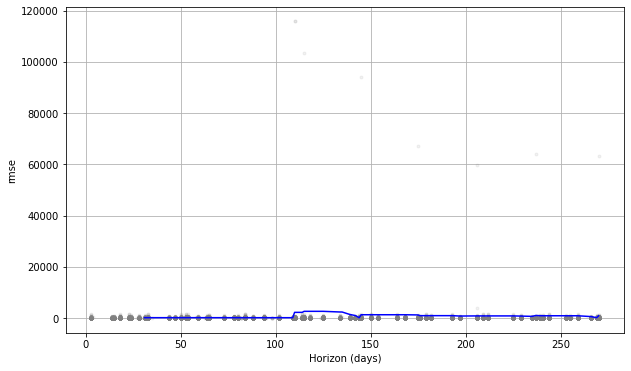

In [ ]:
# plot rmse
plot_cross_validation_metric(df_cv, metric='rmse');

##1 Year

In [ ]:
future_dates_day = m.make_future_dataframe(periods=365*1)

In [ ]:
prediction = m.predict(future_dates_day)

In [ ]:
prediction.tail(20)

ds       trend   yhat_lower   yhat_upper  trend_lower  \
488 2023-01-06  307.967224  -647.054112  1500.048501   300.756571   
489 2023-01-07  308.076701  -588.847200  1456.832487   300.825835   
490 2023-01-08  308.186179  -525.699436  1634.266640   300.899945   
491 2023-01-09  308.295657 -1025.337363  1173.698177   300.974087   
492 2023-01-10  308.405134 -1009.055216  1146.263320   301.048230   
493 2023-01-11  308.514612 -1111.579283  1014.498534   301.122372   
494 2023-01-12  308.624089 -1131.589741  1029.435808   301.196515   
495 2023-01-13  308.733567 -1187.464954   949.912837   301.270658   
496 2023-01-14  308.843045 -1049.311678  1081.807164   301.350388   
497 2023-01-15  308.952522  -745.627762  1367.691453   301.433781   
498 2023-01-16  309.062000 -1127.337053  1023.313100   301.517174   
499 2023-01-17  309.171477 -1114.757114  1173.278578   301.600567   
500 2023-01-18  309.280955  -968.366327  1138.165304   301.683959   
501 2023-01-19  309.390432  -931.767986  1170.589463   301.767283   
502 2023-01-20  309.499910  -871.958720  1182.656660   301.843371   
503 2023-01-21  309.609388  -710.499456  1356.103457   301.920185   
504 2023-01-22  309.718865  -455.334172  1606.865047   301.997419   
505 2023-01-23  309.828343  -857.998721  1340.134580   302.074654   
506 2023-01-24  309.937820  -857.852693  1311.165072   302.151889   
507 2023-01-25  310.047298  -966.281450  1266.666906   302.229124   

     trend_upper  Christmas Day  Christmas Day_lower  Christmas Day_upper  \
488   314.390968            0.0                  0.0                  0.0   
489   314.548681            0.0                  0.0                  0.0   
490   314.680749            0.0                  0.0                  0.0   
491   314.812817            0.0                  0.0                  0.0   
492   314.944792            0.0                  0.0                  0.0   
493   315.076942            0.0                  0.0                  0.0   
494   315.209021            0.0                  0.0                  0.0   
495   315.341089            0.0                  0.0                  0.0   
496   315.480358            0.0                  0.0                  0.0   
497   315.615753            0.0                  0.0                  0.0   
498   315.749636            0.0                  0.0                  0.0   
499   315.883520            0.0                  0.0                  0.0   
500   316.017403            0.0                  0.0                  0.0   
501   316.151286            0.0                  0.0                  0.0   
502   316.285170            0.0                  0.0                  0.0   
503   316.418972            0.0                  0.0                  0.0   
504   316.571925            0.0                  0.0                  0.0   
505   316.741435            0.0                  0.0                  0.0   
506   316.910945            0.0                  0.0                  0.0   
507   317.073915            0.0                  0.0                  0.0   

     Christmas Day (Observed)  ...      weekly  weekly_lower  weekly_upper  \
488                       0.0  ...  -84.816741    -84.816741    -84.816741   
489                       0.0  ...   44.905703     44.905703     44.905703   
490                       0.0  ...  254.696845    254.696845    254.696845   
491                       0.0  ...  -43.181720    -43.181720    -43.181720   
492                       0.0  ...  -39.068521    -39.068521    -39.068521   
493                       0.0  ...  -59.580747    -59.580747    -59.580747   
494                       0.0  ...  -72.954819    -72.954819    -72.954819   
495                       0.0  ...  -84.816741    -84.816741    -84.816741   
496                       0.0  ...   44.905703     44.905703     44.905703   
497                       0.0  ...  254.696845    254.696845    254.696845   
498                       0.0  ...  -43.181720    -43.181720    -43.181720   
499     

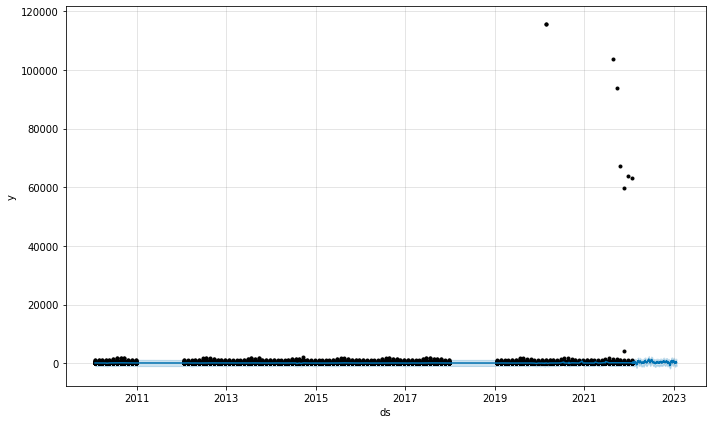

In [ ]:
import matplotlib.pyplot as plt
m.plot(prediction)
plt.show()

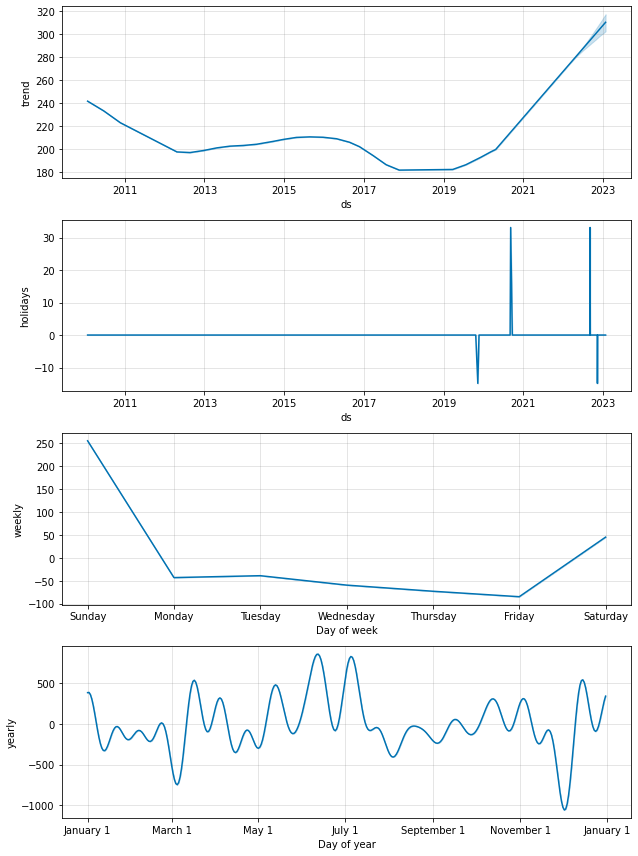

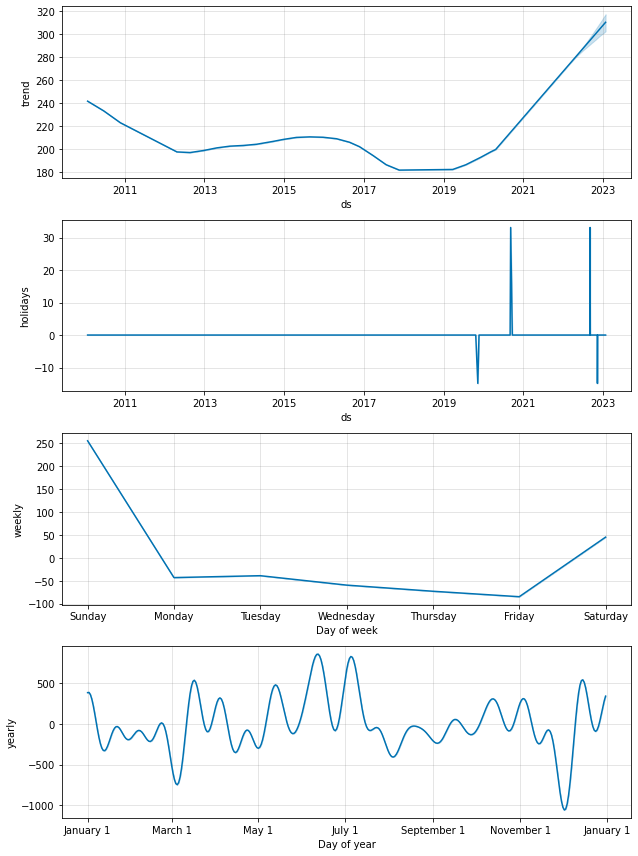

In [ ]:
m.plot_components(prediction)

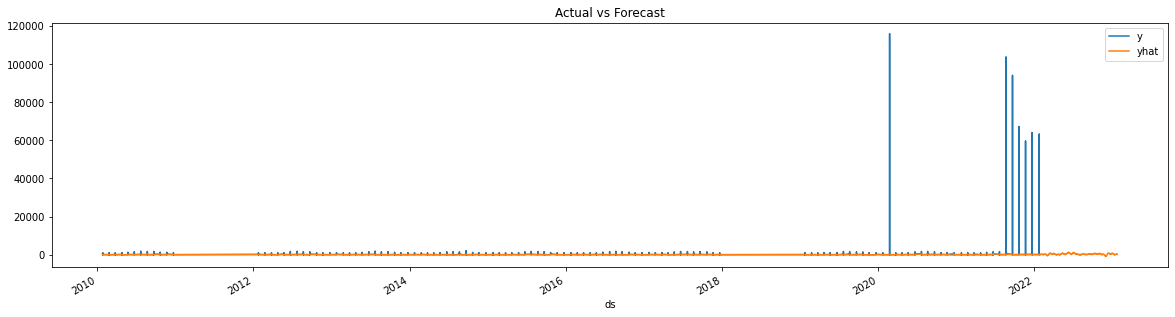

In [ ]:
ax = (df.plot(x='ds',y='y',figsize=(20,5),title='Actual Vs Forecast'))
prediction.plot(x='ds',y='yhat',figsize=(20,5),title='Actual vs Forecast', ax=ax)

In [ ]:
forecast = m.predict(future_dates_day)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower   yhat_upper
503 2023-01-21  315.771322 -681.666640  1431.483192
504 2023-01-22  534.312809 -603.797397  1545.916996
505 2023-01-23  230.496079 -840.925861  1294.891103
506 2023-01-24  216.277763 -829.667488  1208.473077
507 2023-01-25  168.753774 -903.049539  1283.892315

In [ ]:
fig1 = m.plot(forecast) 
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast) 
plt.show()

##10 Years

In [ ]:
future_dates_day = m.make_future_dataframe(periods=365*10)

In [ ]:
prediction = m.predict(future_dates_day)

In [ ]:
prediction.tail(20)

ds       trend  yhat_lower   yhat_upper  trend_lower  \
3773 2032-01-04  667.601086   23.977606  2323.378945   403.266292   
3774 2032-01-05  667.710563 -164.086910  1983.504715   403.318220   
3775 2032-01-06  667.820041 -242.999656  1996.207475   403.337686   
3776 2032-01-07  667.929519 -401.584069  1780.649307   403.236405   
3777 2032-01-08  668.038996 -459.546835  1734.128808   403.135123   
3778 2032-01-09  668.148474 -600.167604  1609.149836   403.033842   
3779 2032-01-10  668.257951 -557.887241  1591.046295   402.932561   
3780 2032-01-11  668.367429 -320.160653  1809.702142   402.831279   
3781 2032-01-12  668.476907 -731.989862  1475.467772   402.729998   
3782 2032-01-13  668.586384 -825.968509  1431.143367   402.628717   
3783 2032-01-14  668.695862 -745.089670  1469.939533   402.527436   
3784 2032-01-15  668.805339 -817.456278  1361.394070   402.426154   
3785 2032-01-16  668.914817 -785.545610  1473.010920   402.324873   
3786 2032-01-17  669.024294 -592.529761  1590.763945   402.223592   
3787 2032-01-18  669.133772 -311.489732  1850.755962   402.122311   
3788 2032-01-19  669.243250 -525.424841  1611.080546   402.021029   
3789 2032-01-20  669.352727 -500.209593  1654.348925   401.932131   
3790 2032-01-21  669.462205 -568.293148  1703.964436   401.855617   
3791 2032-01-22  669.571682 -507.232791  1629.789724   401.779102   
3792 2032-01-23  669.681160 -473.674343  1720.158296   401.702587   

      trend_upper  Christmas Day  Christmas Day_lower  Christmas Day_upper  \
3773   941.425589            0.0                  0.0                  0.0   
3774   941.651765            0.0                  0.0                  0.0   
3775   941.877942            0.0                  0.0                  0.0   
3776   942.104119            0.0                  0.0                  0.0   
3777   942.330295            0.0                  0.0                  0.0   
3778   942.540433            0.0                  0.0                  0.0   
3779   942.749700            0.0                  0.0                  0.0   
3780   942.958967            0.0                  0.0                  0.0   
3781   943.168234            0.0                  0.0                  0.0   
3782   943.375892            0.0                  0.0                  0.0   
3783   943.577474            0.0                  0.0                  0.0   
3784   943.779055            0.0                  0.0                  0.0   
3785   943.980637            0.0                  0.0                  0.0   
3786   944.182219            0.0                  0.0                  0.0   
3787   944.383800            0.0                  0.0                  0.0   
3788   944.585382            0.0                  0.0                  0.0   
3789   944.718454            0.0                  0.0                  0.0   
3790   944.814419            0.0                  0.0                  0.0   
3791   944.910384            0.0                  0.0                  0.0   
3792   945.006349            0.0                  0.0                  0.0   

      Christmas Day (Observed)  ...      weekly  weekly_lower  weekly_upper  \
3773                       0.0  ...  254.696845    254.696845    254.696845   
3774                       0.0  ...  -43.181720    -43.181720    -43.181720   
3775                       0.0  ...  -39.068521    -39.068521    -39.068521   
3776                       0.0  ...  -59.580747    -59.580747    -59.580747   
3777                       0.0  ...  -72.954819    -72.954819    -72.954819   
3778                       0.0  ...  -84.816741    -84.816741    -84.816741   
3779                       0.0  ...   44.905703     44.905703     44.905703   
3780                       0.0  ...  254.696845    254.696845    254.696845   
3781                       0.0  ...  -43.181720    -43.181720    -43.181720   
3782                       0.0  ...  -39.068521    -39.068521    -39.068521   
3783                       0.0  ...  -59.580747    -59.

In [ ]:
import matplotlib.pyplot as plt
m.plot(prediction)
plt.show()

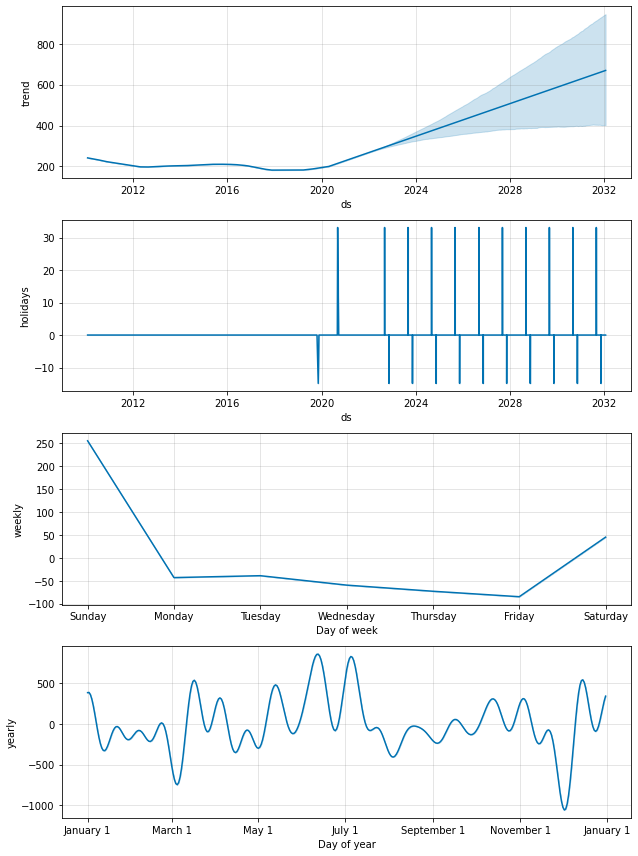

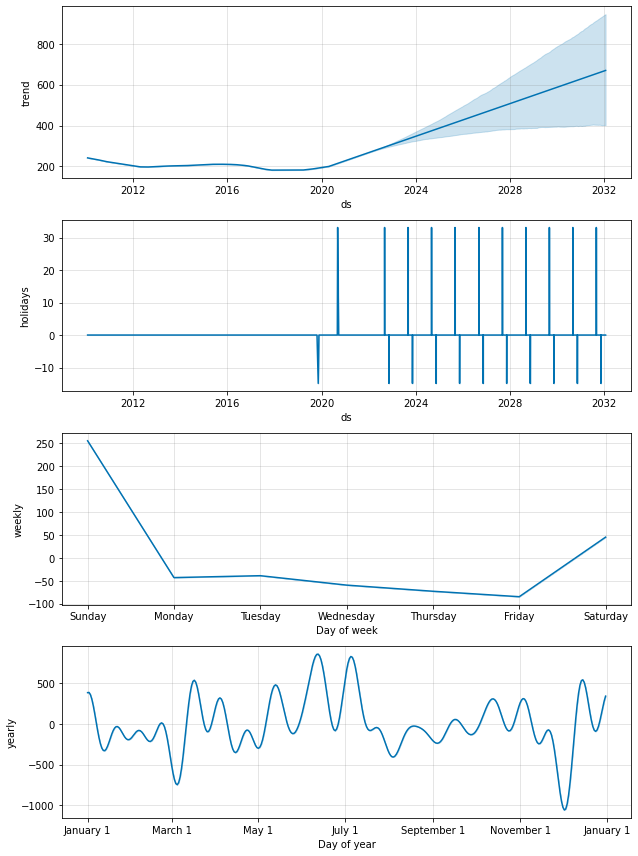

In [ ]:
m.plot_components(prediction)

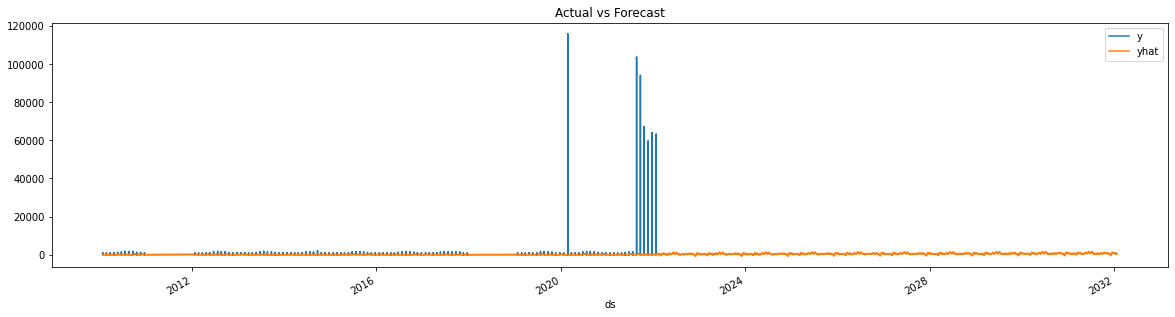

In [ ]:
ax = (df.plot(x='ds',y='y',figsize=(20,5),title='Actual Vs Forecast'))
prediction.plot(x='ds',y='yhat',figsize=(20,5),title='Actual vs Forecast', ax=ax)

In [ ]:
forecast = m.predict(future_dates_day)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower   yhat_upper
3788 2032-01-19  515.004801 -526.674327  1647.133796
3789 2032-01-20  559.559565 -495.653122  1583.684156
3790 2032-01-21  566.583429 -502.883313  1665.686983
3791 2032-01-22  565.782667 -545.186631  1671.680117
3792 2032-01-23  551.505337 -542.771680  1626.414562

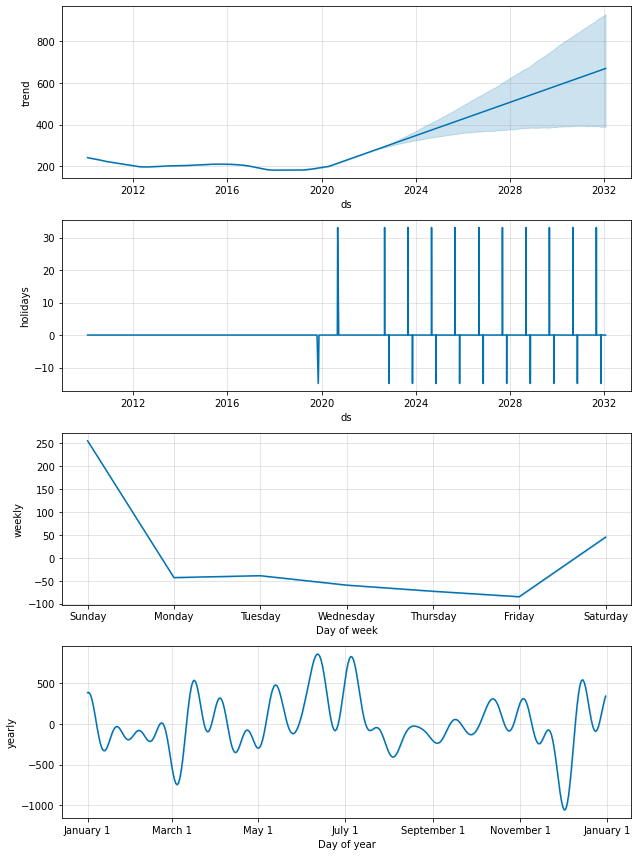

In [ ]:
fig1 = m.plot(forecast) 
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast) 
plt.show()

##20 Years

In [ ]:
future_dates_day = m.make_future_dataframe(periods=365*20)

In [ ]:
prediction = m.predict(future_dates_day)

In [ ]:
prediction.tail(20)

ds        trend  yhat_lower   yhat_upper  trend_lower  \
7423 2042-01-01  1067.194266   75.880859  2621.186089   245.737658   
7424 2042-01-02  1067.303744  113.170126  2707.426490   245.759833   
7425 2042-01-03  1067.413221  117.746070  2743.617813   245.782007   
7426 2042-01-04  1067.522699  104.014676  2745.607453   245.804182   
7427 2042-01-05  1067.632176  266.140430  2872.902073   245.826356   
7428 2042-01-06  1067.741654 -121.324019  2571.465958   245.848531   
7429 2042-01-07  1067.851131 -223.693833  2433.861570   245.870705   
7430 2042-01-08  1067.960609 -243.216340  2226.405175   245.892880   
7431 2042-01-09  1068.070087 -505.458897  2182.886122   245.915054   
7432 2042-01-10  1068.179564 -505.016609  2095.730887   245.937229   
7433 2042-01-11  1068.289042 -510.691751  2142.729908   245.959404   
7434 2042-01-12  1068.398519 -373.157618  2329.301106   245.981578   
7435 2042-01-13  1068.507997 -708.160167  2091.283370   246.003753   
7436 2042-01-14  1068.617475 -632.668988  1993.415771   246.025927   
7437 2042-01-15  1068.726952 -599.786552  2087.371930   246.048102   
7438 2042-01-16  1068.836430 -550.416333  2017.096878   246.070276   
7439 2042-01-17  1068.945907 -576.462045  2190.441400   246.092451   
7440 2042-01-18  1069.055385 -327.865837  2308.017558   246.114625   
7441 2042-01-19  1069.164862  -61.081089  2594.560574   246.136800   
7442 2042-01-20  1069.274340 -238.598350  2238.917755   246.158975   

      trend_upper  Christmas Day  Christmas Day_lower  Christmas Day_upper  \
7423  1851.080770            0.0                  0.0                  0.0   
7424  1851.488925            0.0                  0.0                  0.0   
7425  1851.897080            0.0                  0.0                  0.0   
7426  1852.305236            0.0                  0.0                  0.0   
7427  1852.713391            0.0                  0.0                  0.0   
7428  1853.121547            0.0                  0.0                  0.0   
7429  1853.529702            0.0                  0.0                  0.0   
7430  1853.937858            0.0                  0.0                  0.0   
7431  1854.346013            0.0                  0.0                  0.0   
7432  1854.731084            0.0                  0.0                  0.0   
7433  1855.036830            0.0                  0.0                  0.0   
7434  1855.342575            0.0                  0.0                  0.0   
7435  1855.648321            0.0                  0.0                  0.0   
7436  1855.954067            0.0                  0.0                  0.0   
7437  1856.259812            0.0                  0.0                  0.0   
7438  1856.565558            0.0                  0.0                  0.0   
7439  1856.871303            0.0                  0.0                  0.0   
7440  1857.177049            0.0                  0.0                  0.0   
7441  1857.482795            0.0                  0.0                  0.0   
7442  1857.788540            0.0                  0.0                  0.0   

      Christmas Day (Observed)  ...      weekly  weekly_lower  weekly_upper  \
7423                       0.0  ...  -59.580747    -59.580747    -59.580747   
7424                       0.0  ...  -72.954819    -72.954819    -72.954819   
7425                       0.0  ...  -84.816741    -84.816741    -84.816741   
7426                       0.0  ...   44.905703     44.905703     44.905703   
7427                       0.0  ...  254.696845    254.696845    254.696845   
7428                       0.0  ...  -43.181720    -43.181720    -43.181720   
7429                       0.0  ...  -39.068521    -39.068521    -39.068521   
7430                       0.0  ...  -59.580747    -59.580747    -59.580747   
7431                       0.0  ...  -72.954819    -72.954819    -72.954819   
7432                       0.0  ...  -84.816741    -84.816741    -84.816741   
7433                       0.0  ..

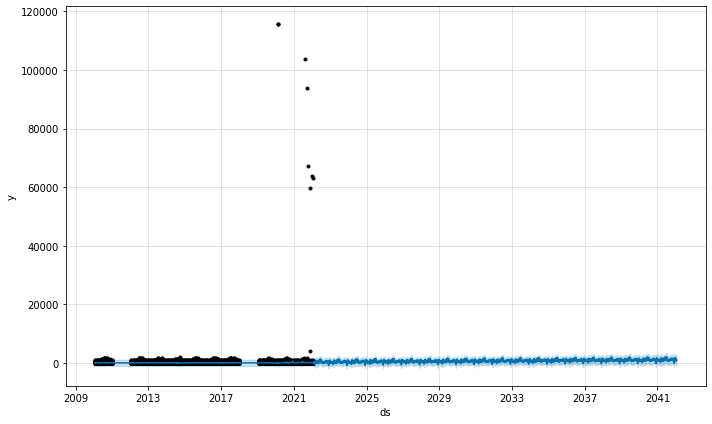

In [ ]:
import matplotlib.pyplot as plt
m.plot(prediction)
plt.show()

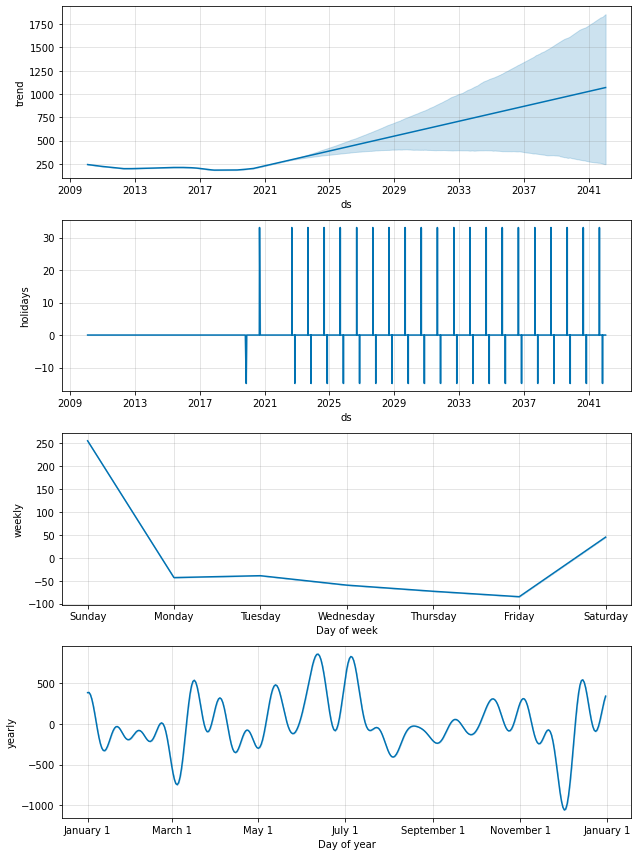

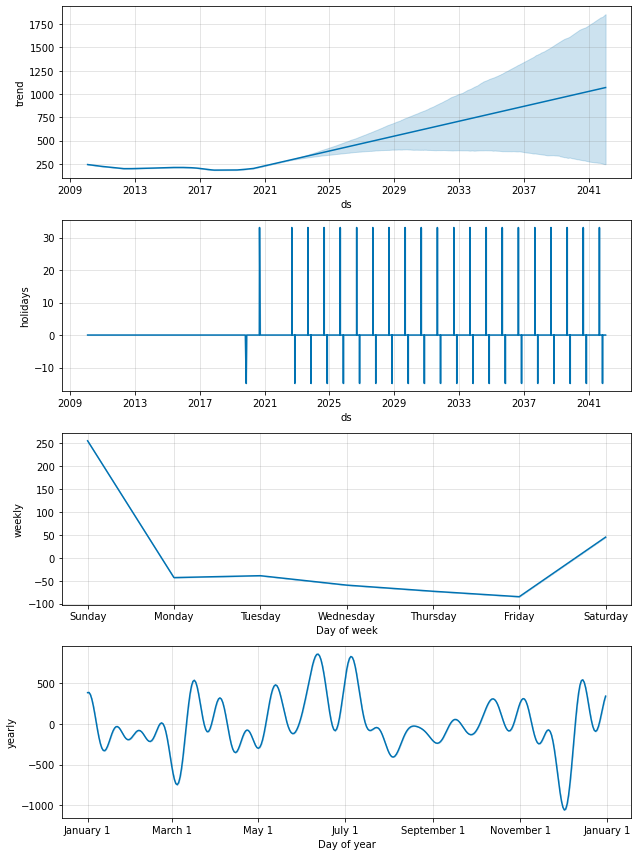

In [ ]:
m.plot_components(prediction)

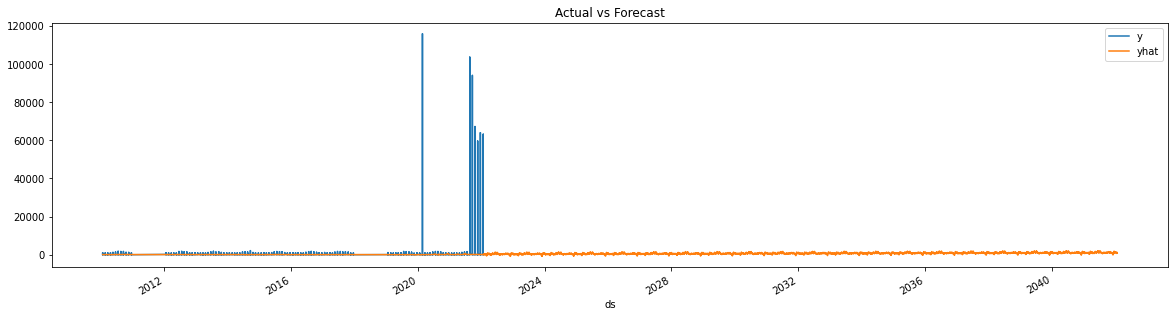

In [ ]:
ax = (df.plot(x='ds',y='y',figsize=(20,5),title='Actual Vs Forecast'))
prediction.plot(x='ds',y='yhat',figsize=(20,5),title='Actual vs Forecast', ax=ax)

In [ ]:
forecast = m.predict(future_dates_day)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat  yhat_lower   yhat_upper
7438 2042-01-16   757.329877 -468.330324  2052.551375
7439 2042-01-17   797.514973 -491.207444  2177.482944
7440 2042-01-18   979.074498 -335.679003  2250.891110
7441 2042-01-19  1234.377635 -113.142011  2575.224599
7442 2042-01-20   970.870577 -328.502834  2245.233448

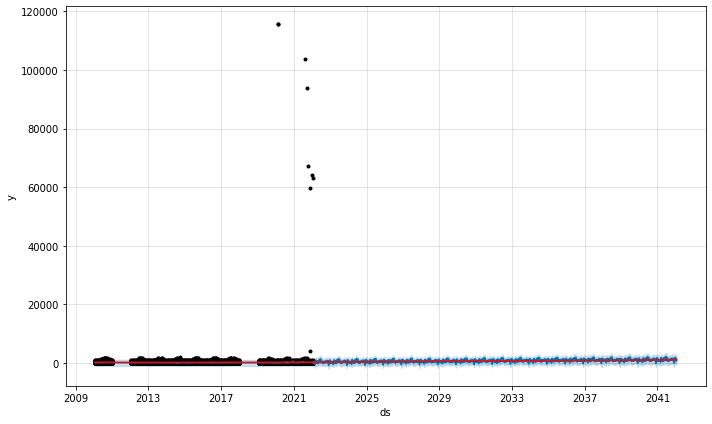

In [ ]:
fig1 = m.plot(forecast) 
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast) 
plt.show()

##Cross Years

In [ ]:
## import prophet eval tools

from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

# Define:

# Initial -- period is 5 years

initial = 5 * 365
initial = str(initial) + ' days'

# Define:

# Period

period = 1 * 365
period = str(period) + ' days'


horizon = 365
horizon = str(horizon) + ' days'

# perform cross-validation -- args: model, initial, period, horizon

df_cv = cross_validation(m, initial=initial, period=period, horizon=horizon)

INFO:prophet:Making 7 forecasts with cutoffs between 2015-01-27 00:00:00 and 2021-01-25 00:00:00


  0%|          | 0/7 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpqgf1dy0i/ezp71_gh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqgf1dy0i/grft27_t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52285', 'data', 'file=/tmp/tmpqgf1dy0i/ezp71_gh.json', 'init=/tmp/tmpqgf1dy0i/grft27_t.json', 'output', 'file=/tmp/tmpqgf1dy0i/prophet_modelxa61e696/prophet_model-20221215001623.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:16:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:16:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqgf1dy0i/rrcfo9mf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqgf1dy0i/3uzef6kx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

In [ ]:
df_cv.head()

ds       yhat  yhat_lower  yhat_upper      y     cutoff
0 2015-02-25  57.474788  -96.081612  202.819670  68.45 2015-01-27
1 2015-02-25  57.474788  -96.339123  210.924562   0.00 2015-01-27
2 2015-02-25  57.474788  -94.811923  217.011441   0.00 2015-01-27
3 2015-02-25  57.474788  -94.804501  222.005761   0.00 2015-01-27
4 2015-02-25  57.474788  -97.984924  209.624640   0.00 2015-01-27

In [ ]:
performance_metrics(df_cv)

INFO:prophet:Skipping MAPE because y close to 0


horizon           mse         rmse         mae     mdape     smape  \
0   30 days  4.559471e+06  2135.291818   98.563111  1.899787  1.226458   
1   31 days  4.559425e+06  2135.281115   98.226304  1.805234  1.229847   
2   44 days  4.559424e+06  2135.280791   98.230313  1.806118  1.229798   
3   58 days  4.559162e+06  2135.219434   97.747845  1.976233  1.227116   
4   59 days  1.207926e+06  1099.056656   68.155349  1.599965  1.227458   
5   60 days  7.482325e+03    86.500435   57.047642  1.689080  1.233147   
6   66 days  7.514769e+03    86.687767   57.113359  1.690612  1.233266   
7   87 days  7.607935e+03    87.223479   57.292762  1.718778  1.230724   
8   88 days  7.301138e+03    85.446694   56.291667  1.837597  1.238542   
9   89 days  7.514968e+03    86.688916   56.419605  1.696955  1.237037   
10  91 days  7.351934e+03    85.743419   56.105054  1.702479  1.233804   
11 117 days  8.721097e+03    93.386812   60.679958  1.669400  1.235761   
12 118 days  8.813645e+03    93.881015   61.170009  1.772701  1.230415   
13 119 days  1.048591e+04   102.400738   69.880661  2.105280  1.233164   
14 147 days  1.239285e+04   111.323160   75.397813  2.542544  1.233247   
15 148 days  1.438158e+04   119.923234   81.134573  2.193283  1.235846   
16 149 days  1.582764e+04   125.807952   86.102147  3.029629  1.241861   
17 153 days  1.582547e+04   125.799338   86.092999  3.029526  1.241664   
18 175 days  1.585406e+04   125.912895   86.168580  3.029526  1.241584   
19 176 days  1.586189e+04   125.943989   86.194899  3.029526  1.241535   
20 178 days  1.698926e+04   130.342861   87.510751  2.360405  1.240527   
21 179 days  1.895606e+04   137.681024   91.678556  2.408634  1.246067   
22 180 days  2.004119e+04   141.566915   93.974876  2.283885  1.246026   
23 208 days  2.111371e+04   145.305575   95.335147  2.165196  1.260645   
24 209 days  2.191733e+04   148.045043   97.888007  2.552532  1.257210   
25 210 days  1.840139e+06  1356.517229  115.086173  2.557221  1.255844   
26 213 days  1.840135e+06  1356.515932  115.074083  2.557221  1.255685   
27 214 days  1.840132e+06  1356.514619  115.060982  2.552532  1.255505   
28 217 days  1.840128e+06  1356.513348  115.050063  2.552532  1.255347   
29 220 days  1.840125e+06  1356.512049  115.037807  2.547829  1.255229   
30 225 days  1.840133e+06  1356.515005  115.065765  2.543224  1.255356   
31 238 days  1.840052e+06  1356.485260  114.665037  2.269335  1.254146   
32 239 days  1.840148e+06  1356.520413  115.963352  2.503907  1.246424   
33 240 days  3.335419e+06  1826.313066  129.296152  2.358437  1.239230   
34 269 days  2.902654e+06  1703.717645  121.033587  2.158911  1.237043   
35 270 days  2.200406e+06  1483.376606  105.966385  2.064182  1.240896   
36 271 days  1.699465e+06  1303.635275   98.247069  2.205276  1.249845   
37 289 days  1.698807e+06  1303.383045   98.253312  2.228290  1.249924   
38 299 days  7.598658e+05   871.702830   79.160268  1.642976  1.248280   
39 300 days  3.685014e+05   607.043126   70.962331  1.792296  1.241706   
40 301 days  7.773563e+05   881.678112   77.659550  1.939383  1.237856   
41 317 days  7.765790e+05   881.237216   77.622710  1.929634  1.238045   
42 325 days  7.763204e+05   881.090461   77.616222  1.929634  1.238118   
43 330 days  6.134533e+05   783.232620   74.253243  1.796052  1.232519   
44 331 days  6.129386e+05   782.903978   72.968877  1.828537  1.222105   
45 332 days  1.306623e+06  1143.076160   82.993444  1.895631  1.222843   
46 348 days  1.306650e+06  1143.087882   83.072663  1.895631  1.223108   
47 363 days  7.020410e+05   837.878875   71.142164  1.924343  1.225592   
48 364 days  6.533376e+05   808.293017   70.859161  1.909512  1.225357   
49 365 days  1.098042e+06  1047.874841   79.472108  2.115559  1.223131   

    coverage  
0   0.961158  
1   0.962450  
2   0.962468  
3   0.963093  
4   0.964389  
5   0.963025  
6   0.963025  
7   0.959449  
8   0.960079  
9   0.959280  
10  0.962328  
11  0.956791  
12  0.957507  
13  0.951334  
14  

/usr/local/lib/python3.8/dist-packages/prophet/plot.py:544: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/usr/local/lib/python3.8/dist-packages/prophet/plot.py:545: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



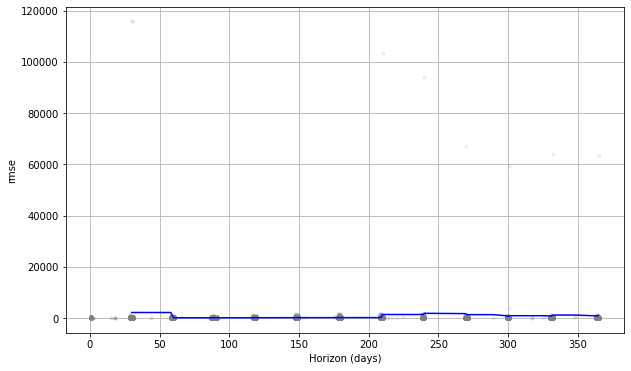

In [ ]:
# plot rmse
plot_cross_validation_metric(df_cv, metric='rmse');